# **GROWTH**

## PREPROCESSING:

In [ ]:
import numpy as np
import pandas as pd
import scipy as stat
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
m_gubc = pd.read_csv('https://raw.githubusercontent.com/sairam2661/datasets/main/Monthly_GUBC.csv?token=GHSAT0AAAAAABQAUXHT5L5VNOJVQWNXZKNYYPTN2UQ')
m_gubc.head()

Date Primary goods  ... Consumer durables Consumer non-durables
0  Apr-12          -1.8  ...               2.0                  -3.0
1  May-12           4.0  ...               5.1                  -0.2
2  Jun-12          -0.3  ...               4.9                   4.9
3  Jul-12          -1.1  ...               2.2                   3.7
4  Aug-12          -3.5  ...               1.1                   3.8

[5 rows x 7 columns]

In [ ]:
m_gubc.tail()

Date Primary goods  ... Consumer durables Consumer non-durables
110  Jun-21          12.0  ...              28.0                  -3.9
111  Jul-21          12.4  ...              19.4                  -2.3
112  Aug-21          17.0  ...               8.2                   5.6
113  Sep-21           4.6  ...              -1.9                   0.2
114  Oct-21           9.0  ...              -6.1                   0.5

[5 rows x 7 columns]

In [ ]:
m_gubc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Date                                115 non-null    object
 1   Primary goods                       115 non-null    object
 2   Capital goods                       115 non-null    object
 3   Intermediate goods                  115 non-null    object
 4   Infrastructure/ construction goods  115 non-null    object
 5   Consumer durables                   115 non-null    object
 6   Consumer non-durables               115 non-null    object
dtypes: object(7)
memory usage: 6.4+ KB


There is no null values in any of the columns.
All columns are of object datatype

changing date from object to date.

In [ ]:
from datetime import datetime, date
# %b - Month in words
# %m - Month in number
# %Y - YYYY
# %y - YY

m_gubc['Date'] = pd.to_datetime(m_gubc['Date'],format = '%b-%y')
m_gubc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                115 non-null    datetime64[ns]
 1   Primary goods                       115 non-null    object        
 2   Capital goods                       115 non-null    object        
 3   Intermediate goods                  115 non-null    object        
 4   Infrastructure/ construction goods  115 non-null    object        
 5   Consumer durables                   115 non-null    object        
 6   Consumer non-durables               115 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 6.4+ KB


 replacing columns with " " to "_" for easy reading.

In [ ]:
m_gubc.columns =m_gubc.columns.str.replace(" ","_")
m_gubc.head() 

Date Primary_goods  ... Consumer_durables Consumer_non-durables
0 2012-04-01          -1.8  ...               2.0                  -3.0
1 2012-05-01           4.0  ...               5.1                  -0.2
2 2012-06-01          -0.3  ...               4.9                   4.9
3 2012-07-01          -1.1  ...               2.2                   3.7
4 2012-08-01          -3.5  ...               1.1                   3.8

[5 rows x 7 columns]

Replacing unwanted symbols with respective most freqeunt values from respective columns

In [ ]:
m_gubc.loc[m_gubc['Primary_goods']=='#','Primary_goods'] = 4
m_gubc.loc[m_gubc['Capital_goods']=='#','Capital_goods'] = 3
m_gubc.loc[m_gubc['Intermediate_goods']=='#','Intermediate_goods'] = 3
m_gubc.loc[m_gubc['Infrastructure/_construction_goods']=='#','Infrastructure/_construction_goods'] = 3
m_gubc.loc[m_gubc['Consumer_durables']=='#','Consumer_durables'] = 4
m_gubc.loc[m_gubc['Consumer_non-durables']=='#','Consumer_non-durables'] = 4

converting object datatype to numeric

In [ ]:
date =  m_gubc['Date']
m_gubc = m_gubc.drop(columns=['Date']).apply(pd.to_numeric)
m_gubc['Date'] = date
m_gubc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Primary_goods                       115 non-null    float64       
 1   Capital_goods                       115 non-null    float64       
 2   Intermediate_goods                  115 non-null    float64       
 3   Infrastructure/_construction_goods  115 non-null    float64       
 4   Consumer_durables                   115 non-null    float64       
 5   Consumer_non-durables               115 non-null    float64       
 6   Date                                115 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 6.4 KB


##DATA VIZUALIZATION:

1.for every feature plot a line plot having time as x axis and a particular feature as y axis.

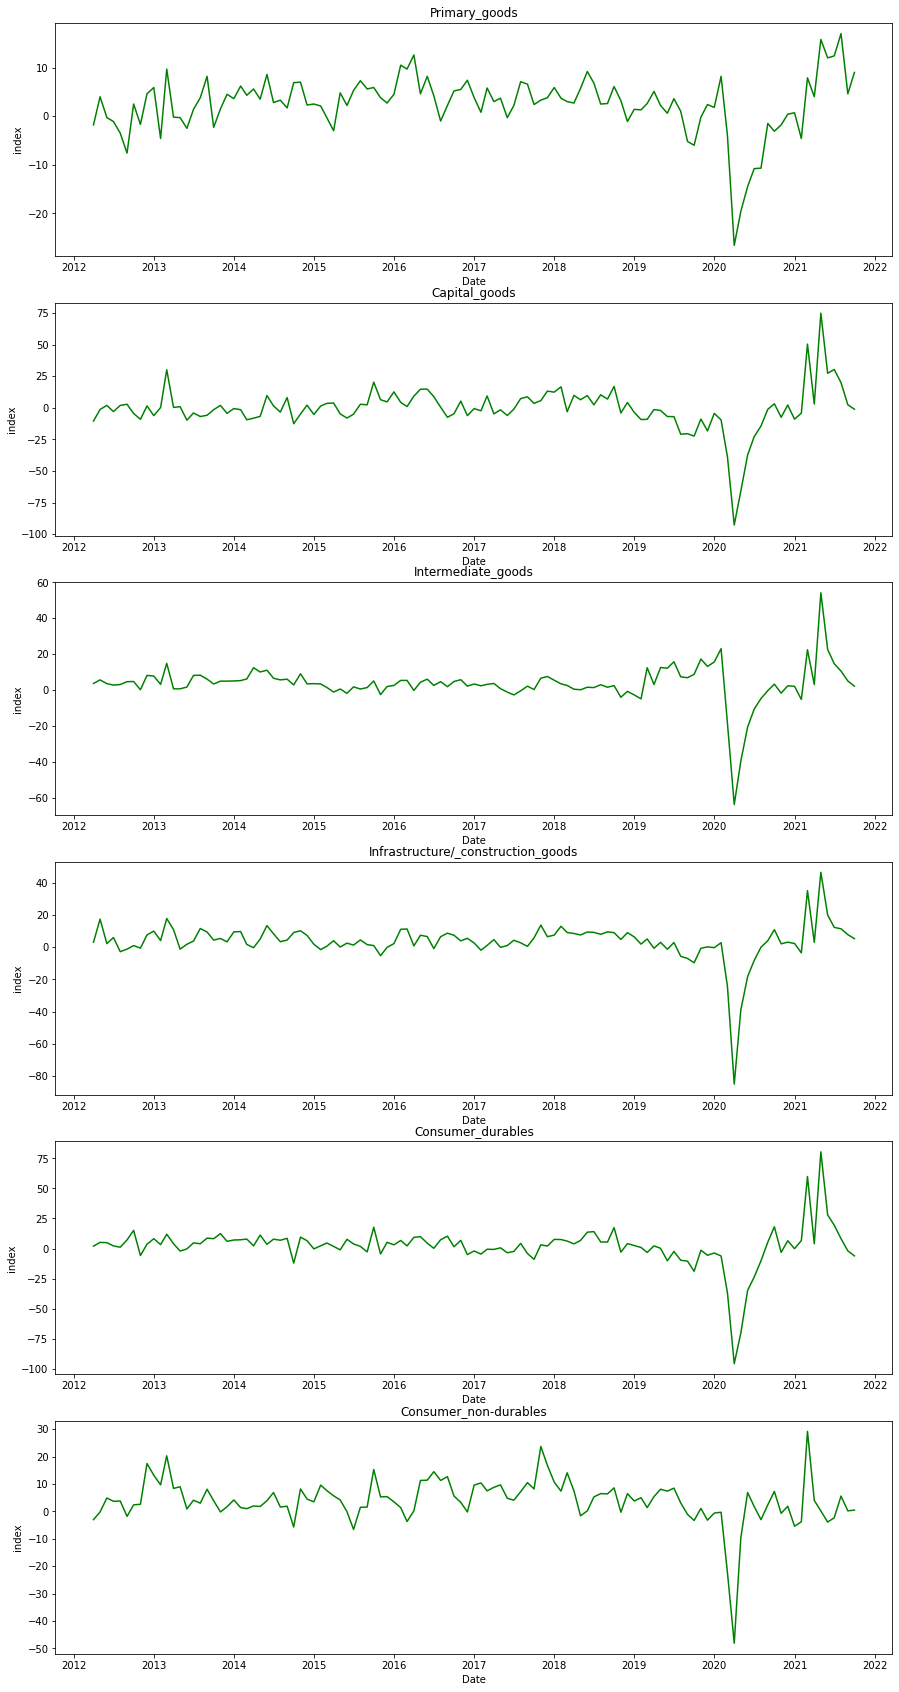

In [ ]:
figure,axes = plt.subplots(nrows=6,ncols=1,figsize=(15,30))

for index,col in enumerate(m_gubc.drop('Date',axis=1).columns):
  sns.lineplot(ax=axes[index],x='Date',y=col,data=m_gubc,color='green')
  axes[index].set_title("{}".format(col))
  axes[index].set_ylabel("index")
 # axes[index].set_xlim([date(2012, 4, 1), date(2021, 10, 1)]) 

Stationarity check:
checking for constant mean and variance.



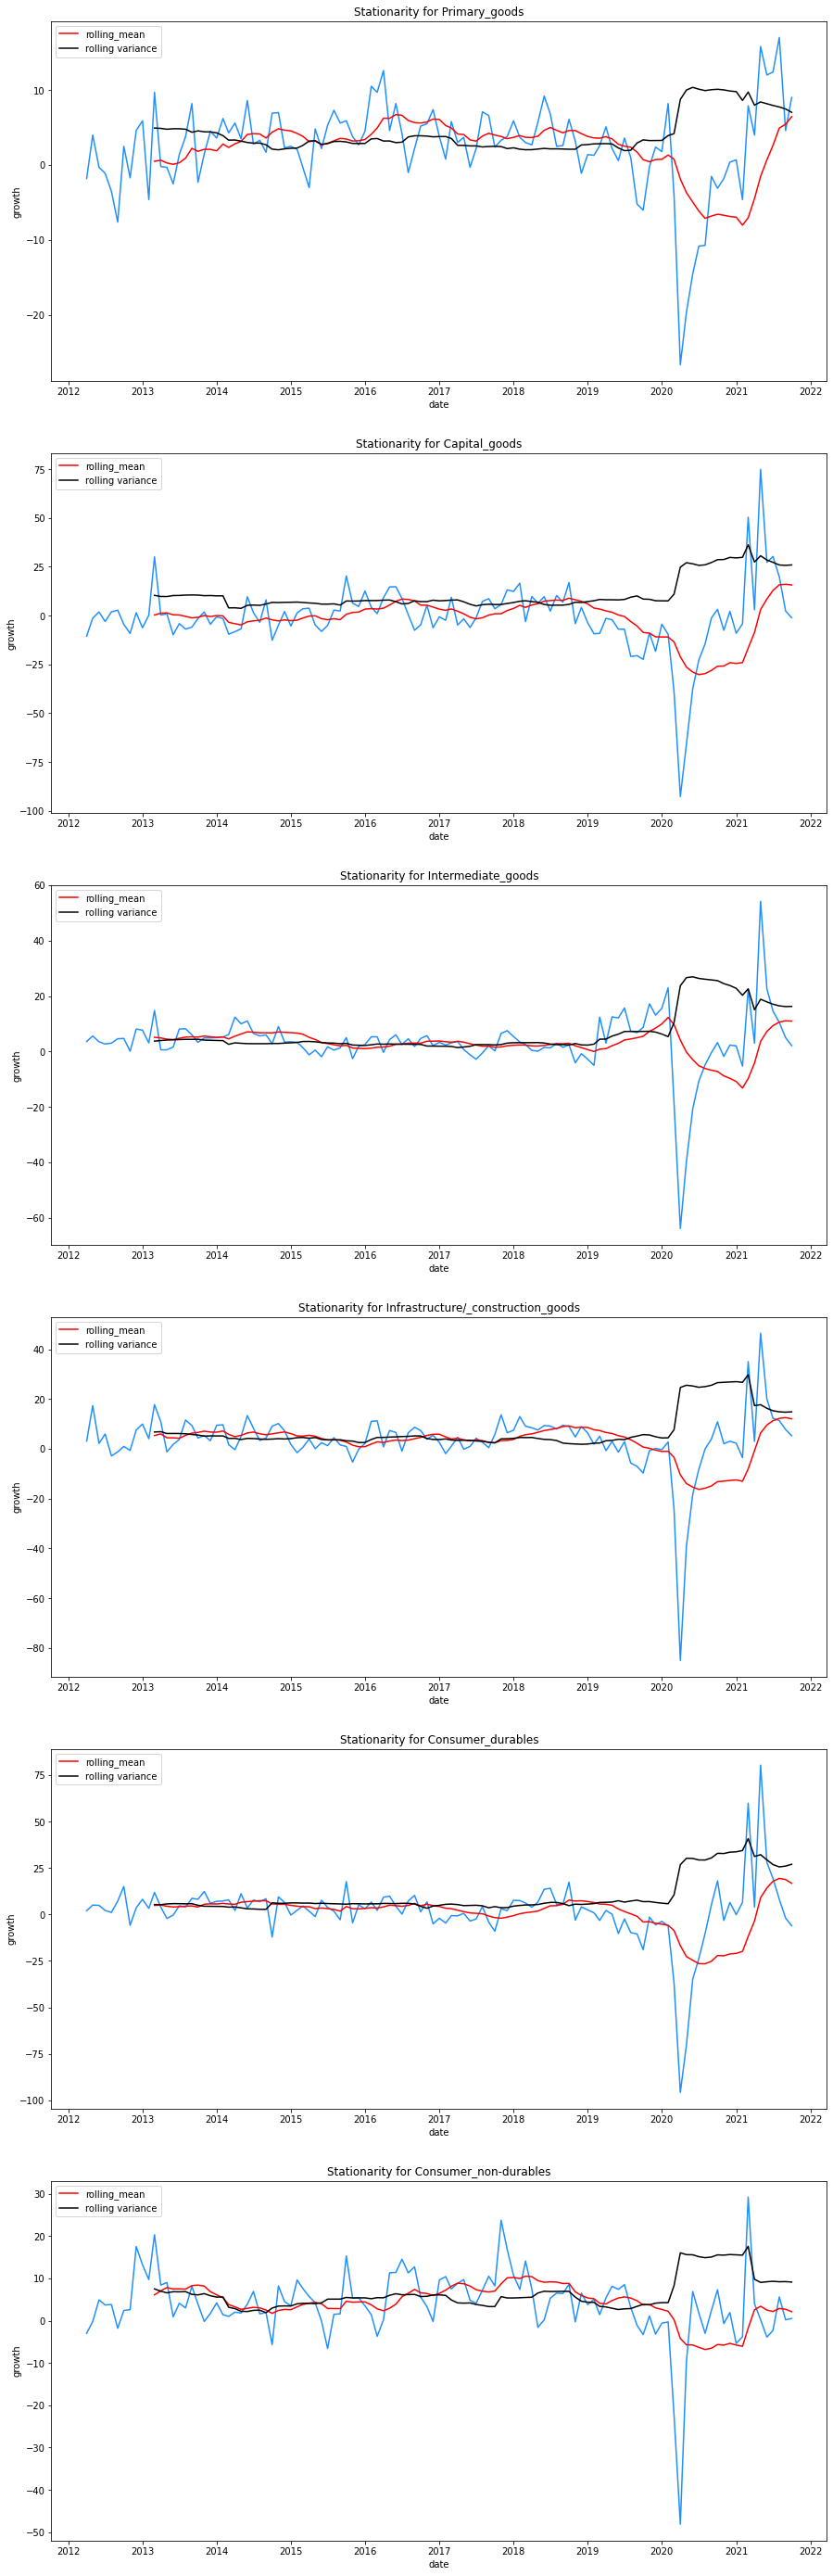

In [ ]:
figure,axes = plt.subplots(nrows=6,ncols=1,figsize=(15,50))
months=12

for index,column in enumerate(m_gubc.drop('Date',axis=1).columns):
  sns.lineplot(ax=axes[index],x=m_gubc['Date'],y=m_gubc[column],color='dodgerblue')
  sns.lineplot(ax=axes[index],x=m_gubc['Date'],y=m_gubc[column].rolling(months).mean(),color='red',label='rolling_mean')
  sns.lineplot(ax=axes[index],x=m_gubc['Date'],y=m_gubc[column].rolling(months).std(),color='black',label='rolling variance')
  axes[index].set_title("Stationarity for {}".format(column))
  axes[index].set_ylabel("growth")
  axes[index].set_xlabel("date")
  #axes[index].set_xlim([date(2012, 4, 1), date(2021, 10, 1)])
  #axes[index].set_ylim(m_gubc[column].min,m_gubc.[column].max)

DECOMPOSITION:

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


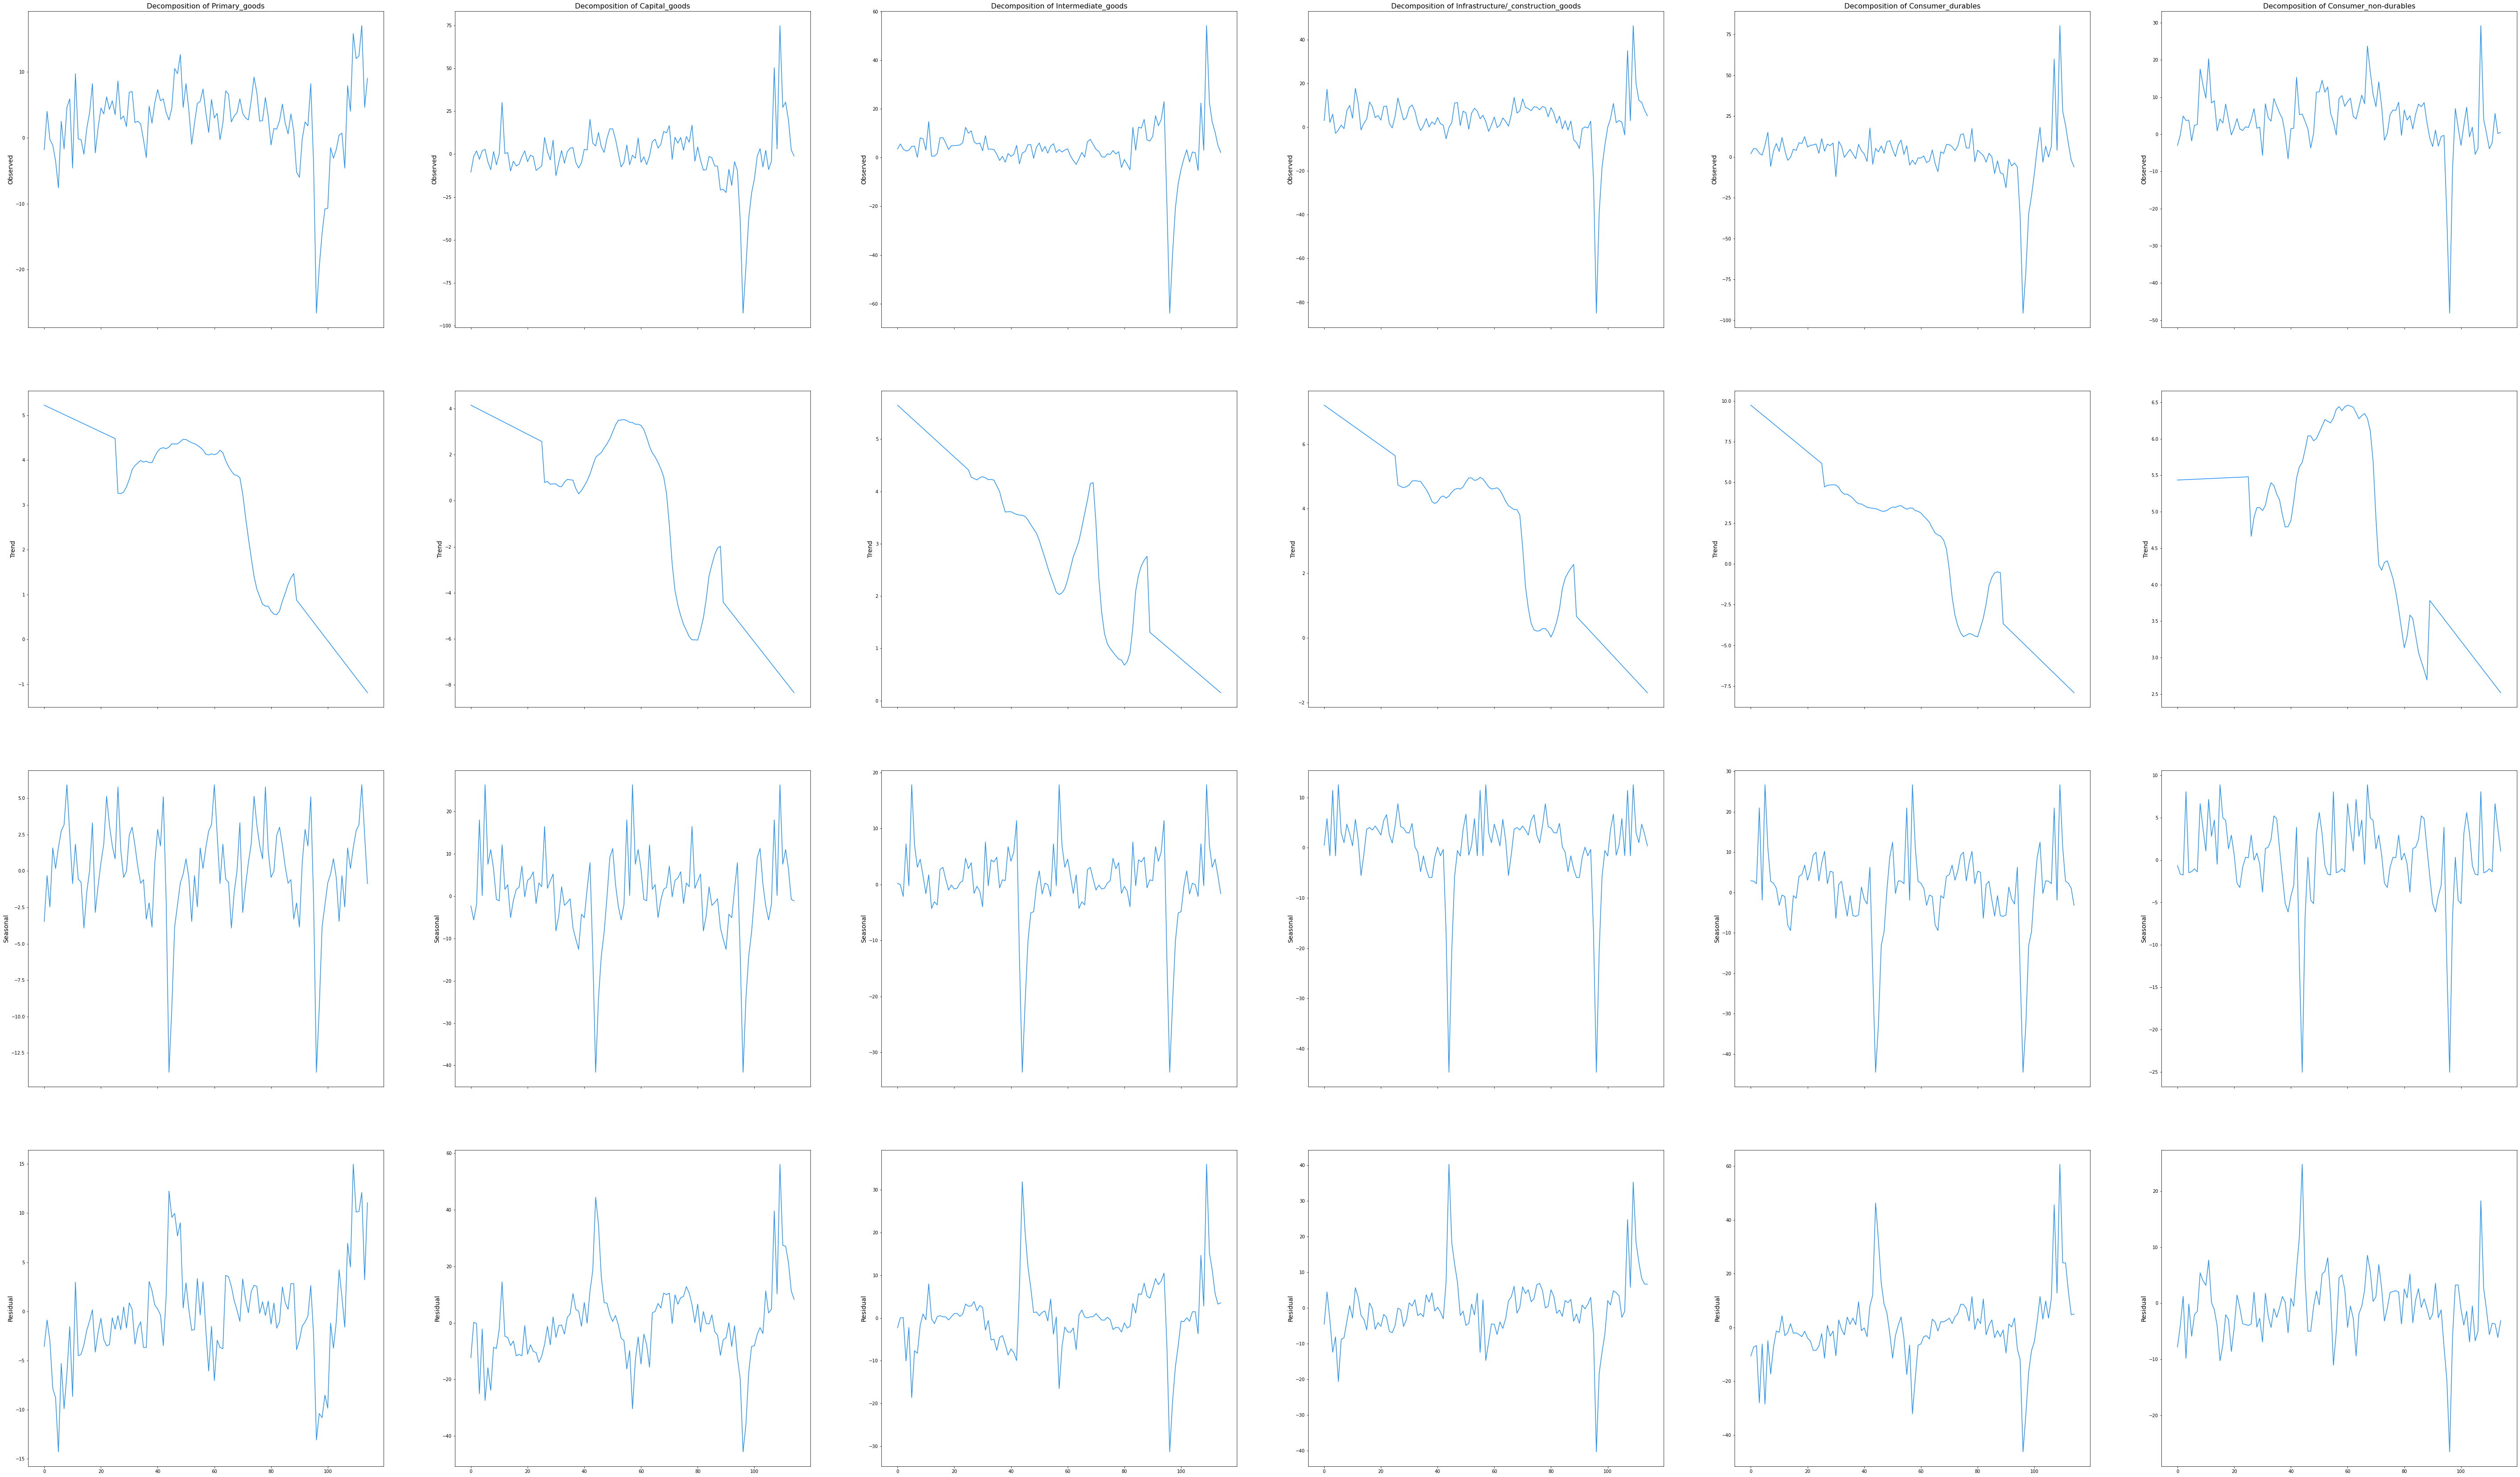

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
figure, axes = plt.subplots(nrows=4,ncols=6,sharex=True, figsize=(100,60))
for i,column in enumerate(m_gubc.drop('Date',axis=1).columns):
    res = seasonal_decompose(m_gubc[column], freq=52, model='additive', extrapolate_trend='freq')

    axes[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=axes[0,i], legend=False, color='dodgerblue')
    axes[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=axes[1,i], legend=False, color='dodgerblue')
    axes[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=axes[2,i], legend=False, color='dodgerblue')
    axes[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=axes[3,i], legend=False, color='dodgerblue')
    axes[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

CHECKING CORRELATION:

In [ ]:
corr_table = m_gubc.corr()
corr_table.style.background_gradient()

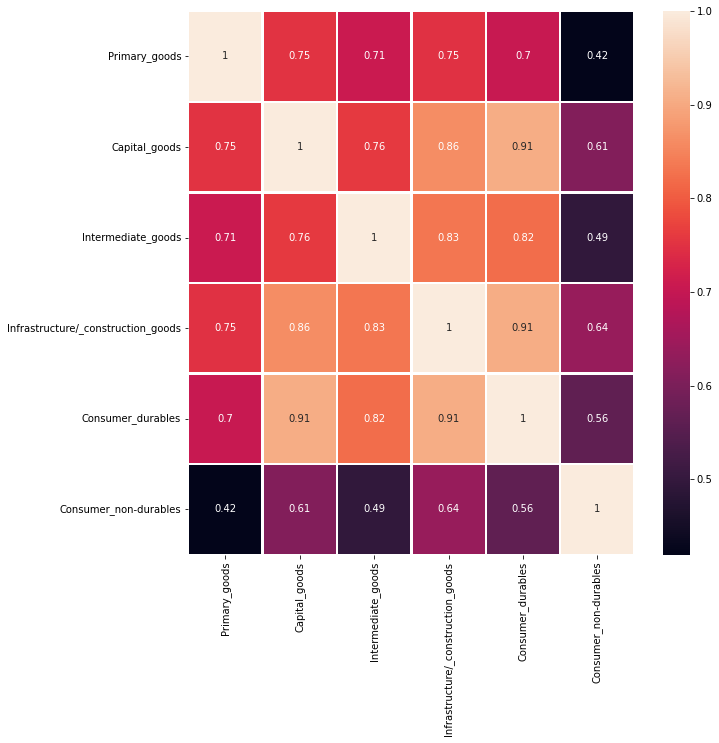

In [ ]:
 figure,axes=plt.subplots(figsize=(10,10))
 sns.heatmap(corr_table,ax=axes,linewidths=1.5,annot=True)


In [ ]:
corr_list = []
column= list(enumerate(m_gubc.drop('Date',axis=1).columns))
for i,col in enumerate(m_gubc.drop('Date',axis=1).columns):
    corr_table.sort_values(by=col,inplace=True)
    corr_list.append(corr_table[col])
i=0
for series in corr_list:
    print("{} and {} : {}".format(series.index[4],column[i][1],series.iloc[4]))
    i=i+1



Capital_goods and Primary_goods : 0.7505066723878792
Consumer_durables and Capital_goods : 0.9053834446836689
Infrastructure/_construction_goods and Intermediate_goods : 0.8335565702574032
Consumer_durables and Infrastructure/_construction_goods : 0.9053953221565173
Infrastructure/_construction_goods and Consumer_durables : 0.9053953221565173
Infrastructure/_construction_goods and Consumer_non-durables : 0.6387700727877045


##EXPLORATORY ANALYSIS

In [ ]:
m_gubc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Primary_goods                       115 non-null    float64       
 1   Capital_goods                       115 non-null    float64       
 2   Intermediate_goods                  115 non-null    float64       
 3   Infrastructure/_construction_goods  115 non-null    float64       
 4   Consumer_durables                   115 non-null    float64       
 5   Consumer_non-durables               115 non-null    float64       
 6   Date                                115 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 6.4 KB


In [ ]:
dm_gubc = m_gubc.copy()

In [ ]:
dm_gubc['Year'] = pd.DatetimeIndex(m_gubc['Date']).year
dm_gubc['Month'] = pd.DatetimeIndex(m_gubc['Date']).month
dm_gubc['Week_of_year'] = pd.DatetimeIndex(m_gubc['Date']).weekofyear
dm_gubc['Quarter'] = pd.DatetimeIndex(m_gubc['Date']).quarter
dm_gubc.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


Primary_goods  Capital_goods  ...  Week_of_year  Quarter
0           -1.8          -10.5  ...            13        2
1            4.0           -1.3  ...            18        2
2           -0.3            1.9  ...            22        2
3           -1.1           -3.0  ...            26        3
4           -3.5            1.9  ...            31        3
5           -7.6            2.8  ...            35        3
6            2.5           -4.5  ...            40        4
7           -1.7           -9.1  ...            44        4
8            4.6            1.5  ...            48        4
9            5.9           -6.2  ...             1        1

[10 rows x 11 columns]

In [ ]:
dm_gubc.drop(columns=['Date'],inplace=True)
dm_gubc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Primary_goods                       115 non-null    float64
 1   Capital_goods                       115 non-null    float64
 2   Intermediate_goods                  115 non-null    float64
 3   Infrastructure/_construction_goods  115 non-null    float64
 4   Consumer_durables                   115 non-null    float64
 5   Consumer_non-durables               115 non-null    float64
 6   Year                                115 non-null    int64  
 7   Month                               115 non-null    int64  
 8   Week_of_year                        115 non-null    int64  
 9   Quarter                             115 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 9.1 KB


AGGREGATE SALES

In [ ]:
y_table=dm_gubc.pivot_table(index='Year',values=['Primary_goods','Capital_goods','Intermediate_goods','Infrastructure/_construction_goods','Consumer_durables','Consumer_non-durables'],aggfunc='mean')
y_table.style.background_gradient('Blues')

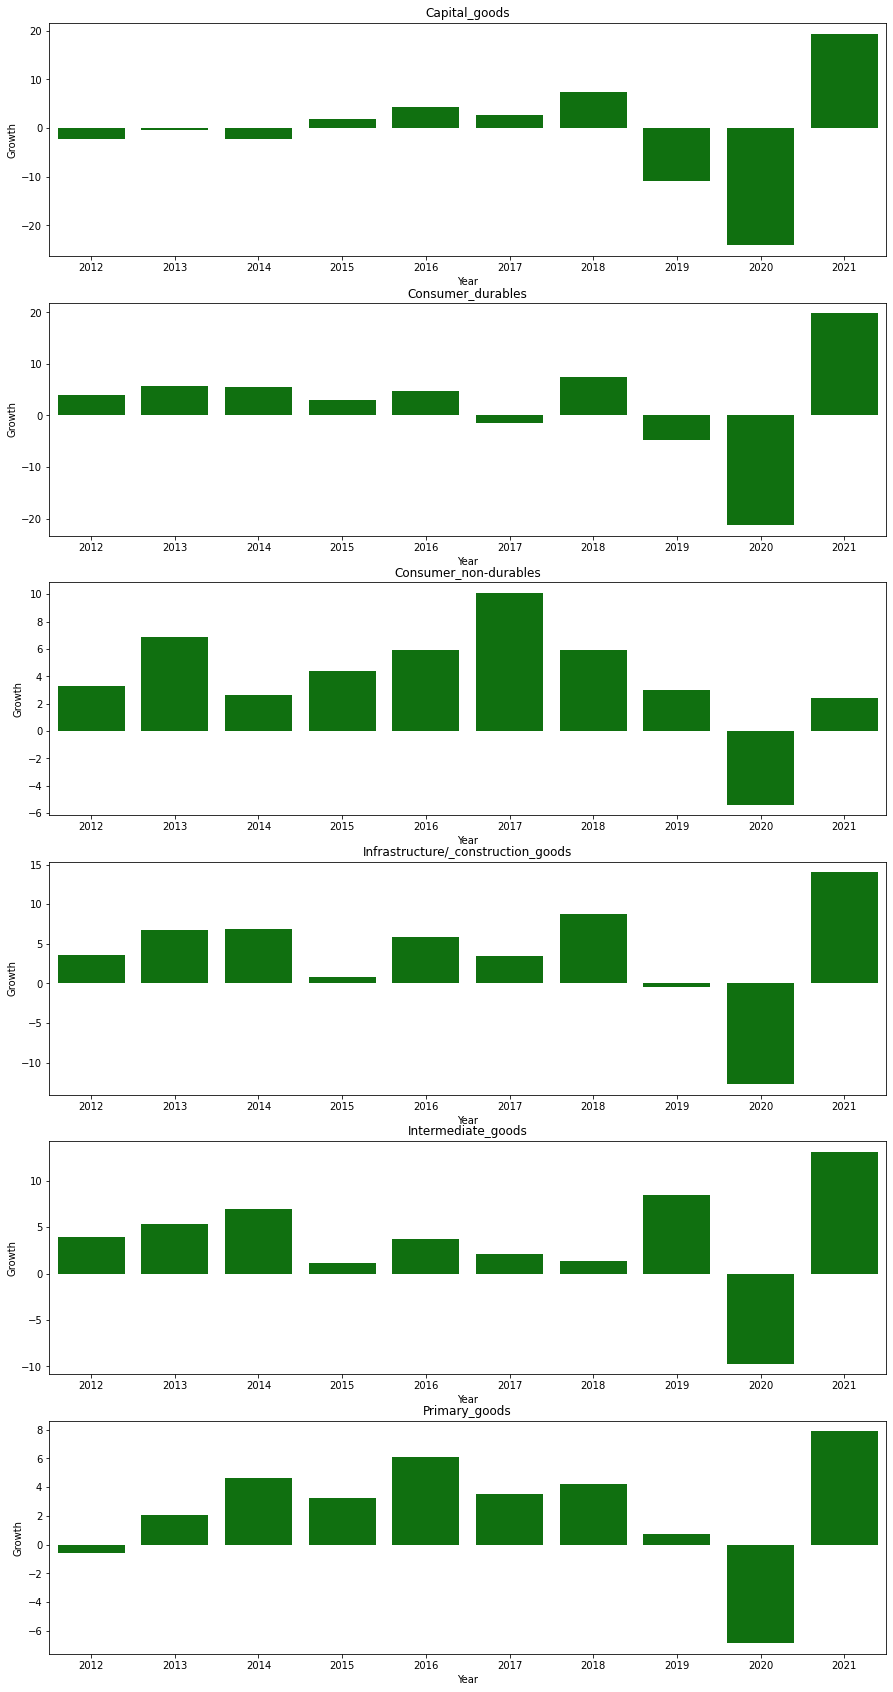

In [ ]:
fig,ax = plt.subplots(nrows=6,ncols=1,figsize=(15,30))

for i,col in enumerate(y_table.columns):
  sns.barplot(x=y_table.index,y=y_table[col],ax=ax[i],color='green')
  ax[i].set_title("{}".format(col))
  ax[i].set_ylabel("Growth")

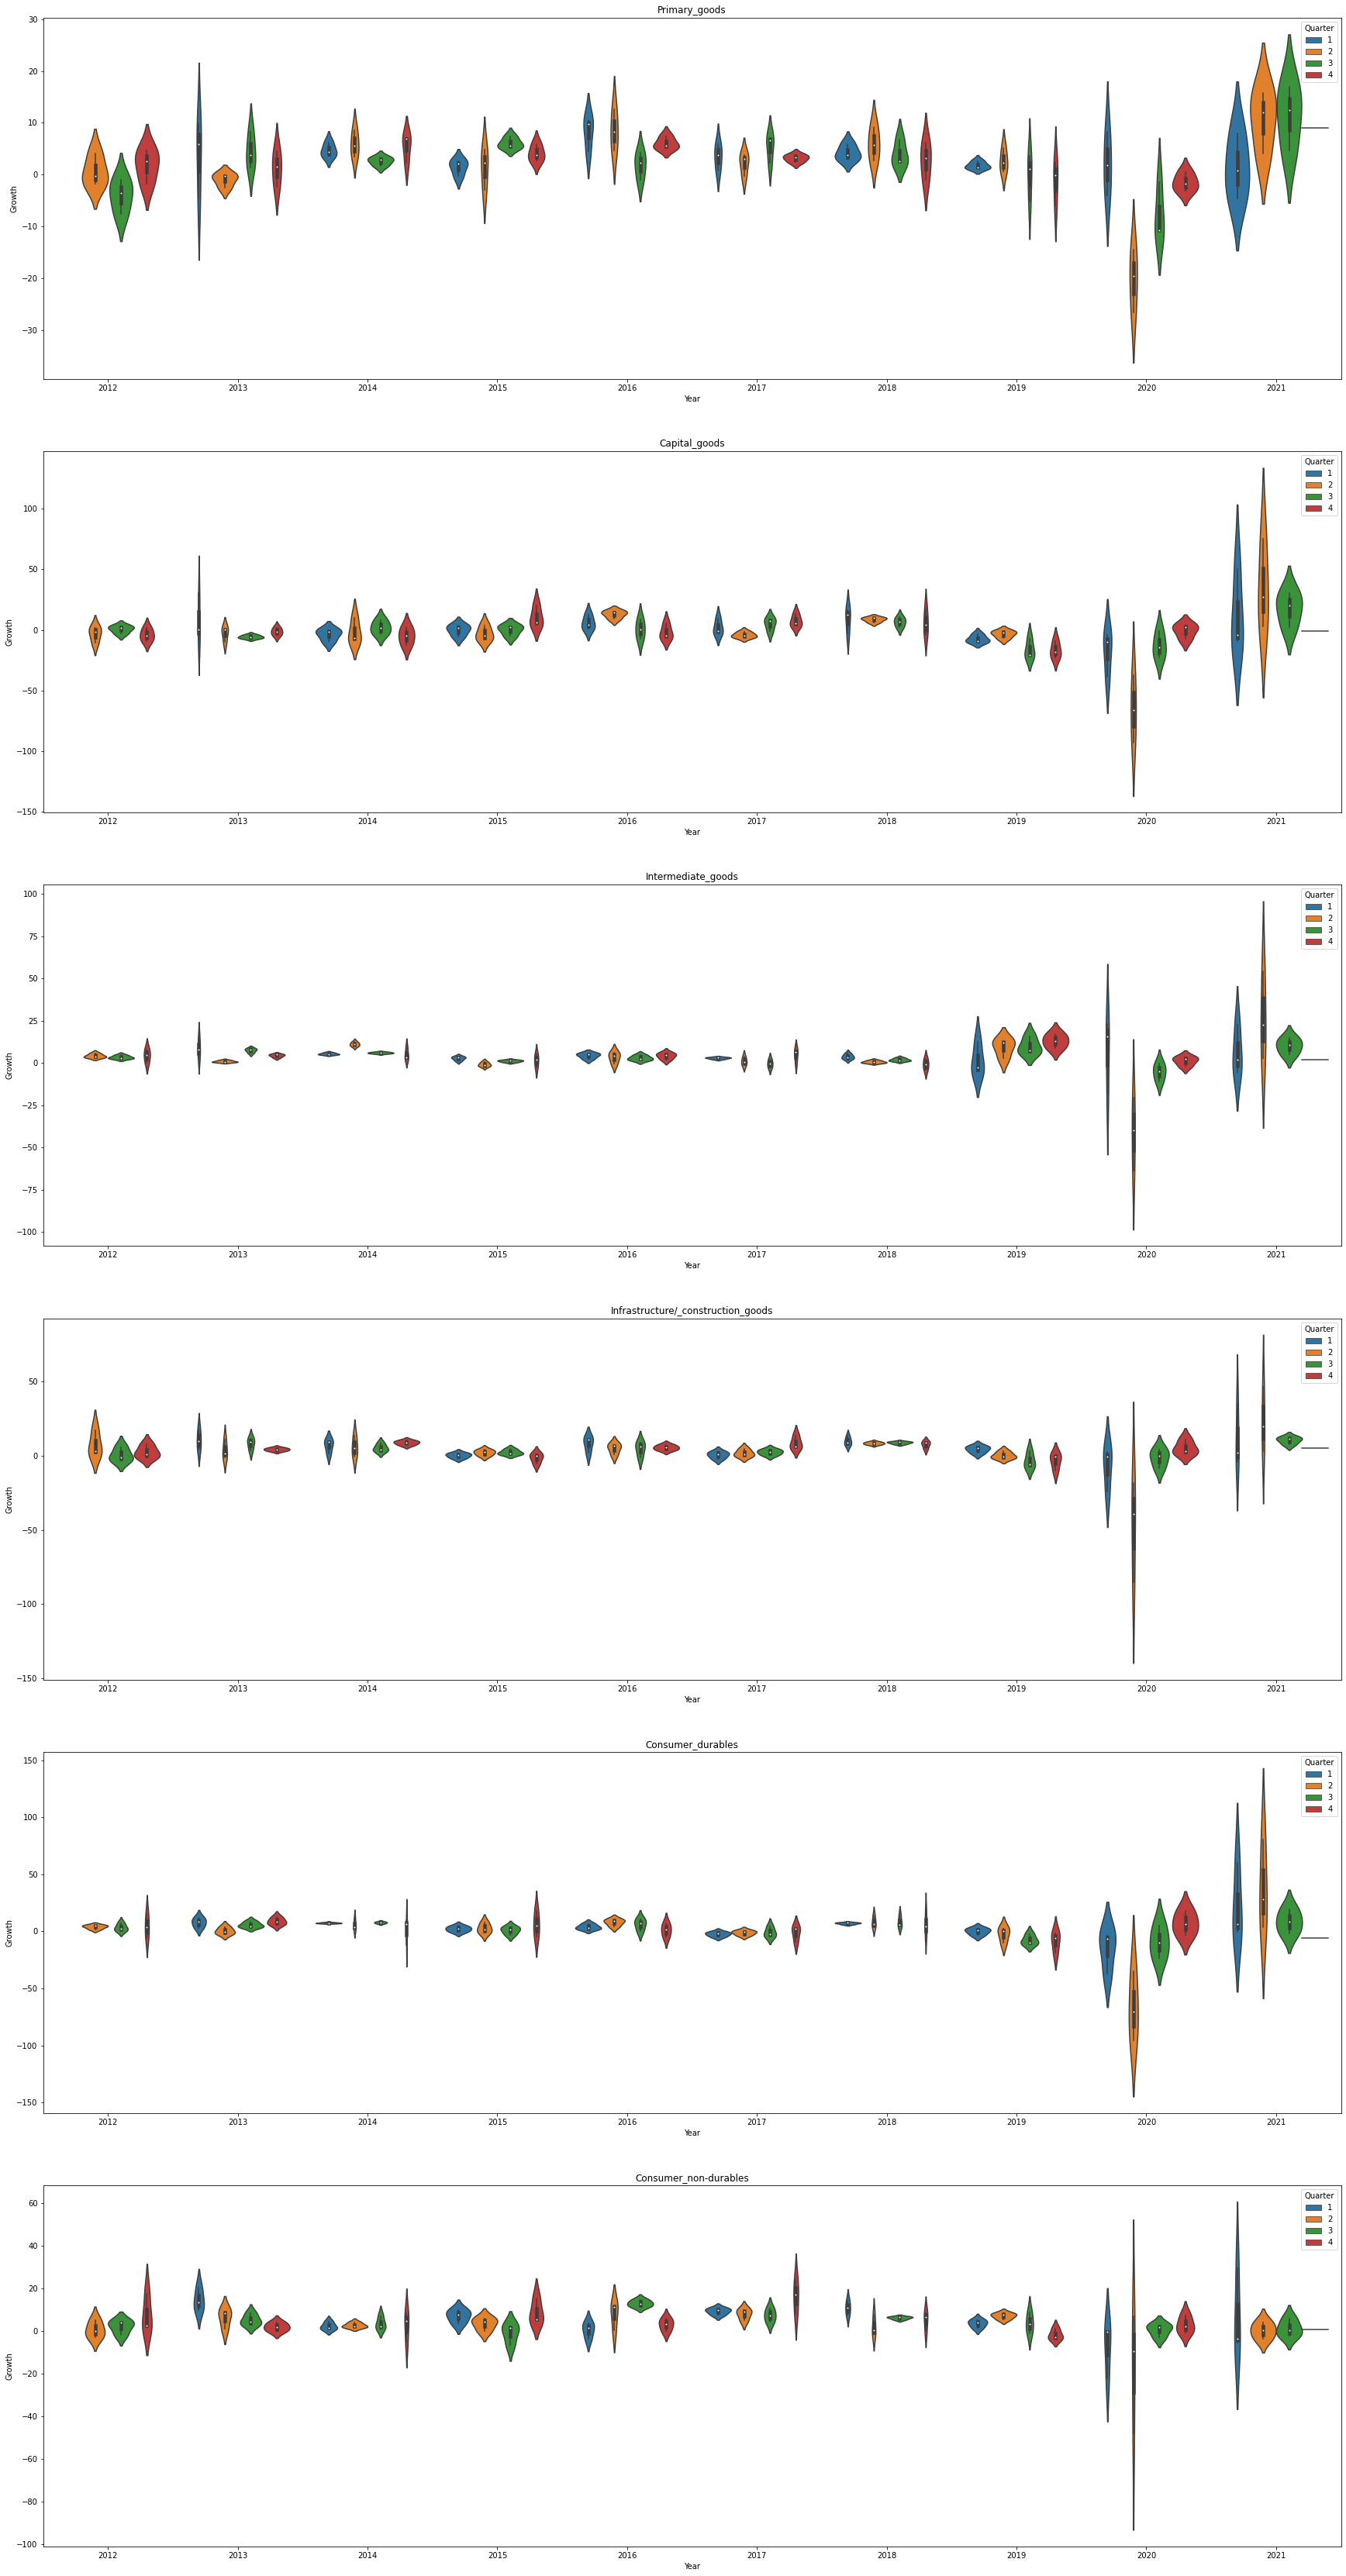

In [ ]:
fig,ax = plt.subplots(nrows=6,ncols=1,figsize=(30,60))
i=0
for col in list(dm_gubc.drop(columns=['Year','Month','Week_of_year','Quarter']).columns):
  sns.violinplot(x='Year',y=col,hue='Quarter',data=dm_gubc,ax=ax[i])
  ax[i].set_title("{}".format(col))
  ax[i].set_ylabel("Growth")
  i=i+1

Through the above plot we can infer the growth of each goods and their performance in each quarters.

Seasonal influences on every product could be studied in detail using the plot

In [ ]:
plt.figure(figsize=(12,8))
bars=plt.bar(x=y_table.index,height=y_table.T.mean(),color='dodgerblue')
bars[7].set_color('red')
bars[8].set_color('red')
plt.xlabel('Year')
plt.ylabel('Growth')
plt.show()
#sns.(x=y_table.index,y=std_table.T.mean,color='black')
#plt.show()


In [ ]:
m_gubc.describe()

Primary_goods  Capital_goods  ...  Consumer_durables  Consumer_non-durables
count     115.000000     115.000000  ...         115.000000             115.000000
mean        2.490435      -0.723478  ...           1.943478               3.971304
std         5.996885      17.341611  ...          17.107176               8.161052
min       -26.600000     -92.700000  ...         -95.700000             -48.100000
25%         0.100000      -6.200000  ...          -2.050000               0.350000
50%         3.000000      -1.100000  ...           3.500000               3.900000
75%         5.650000       5.000000  ...           7.250000               7.850000
max        17.000000      74.900000  ...          80.400000              29.200000

[8 rows x 6 columns]

AUTO CORRELATION:

In [ ]:
from pandas.plotting import autocorrelation_plot
for column in m_gubc.drop('Date', axis=1):
    autocorrelation_plot(m_gubc[column])
    plt.title('{}'.format(column))
    plt.show()

##Modelling

### AUGMENTED DICKY FULLER TEST

to confirm the presence of stationarity of values we using a statistical method called unit root test.

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(series):

  roll_avg = series.rolling(12).mean()
  roll_std = series.rolling(12).std()

  plt.plot(series,color='dodgerblue',label='value')
  plt.plot(roll_avg,color='green',label='rool mean')
  plt.plot(roll_std,color='black',label='roll std')
  plt.legend(loc='best')
  plt.title('Stationarity')
  plt.figure(dpi=200,figsize=(8,5))
  plt.show()

  print("\n\ntest results:")
  result = adfuller(series,autolag='AIC')
  ouput = pd.Series(result,index=['Test statistic','p-value','#Lags Used','Number of obs','Critical values','#'])
  print(ouput)

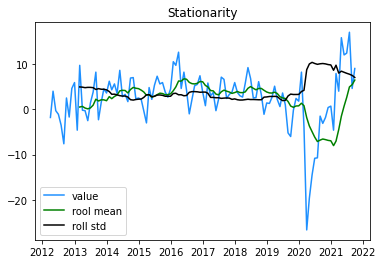

<Figure size 1600x1000 with 0 Axes>



test results:
Test statistic                                              -5.00742
p-value                                                  2.14547e-05
#Lags Used                                                         0
Number of obs                                                    114
Critical values    {'1%': -3.489057523907491, '5%': -2.8872463271...
#                                                            592.268
dtype: object


In [ ]:

nm_gubc = m_gubc.set_index('Date')
test_sts = nm_gubc['Primary_goods']
test_stationarity(test_sts)


Since Test statistic < critical value the Graph is stationary.

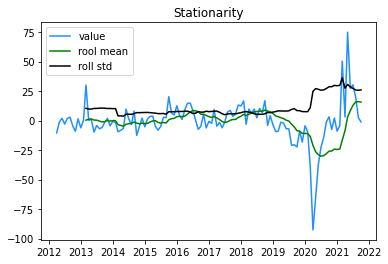

<Figure size 1600x1000 with 0 Axes>



test results:
Test statistic                                              -3.87741
p-value                                                   0.00220753
#Lags Used                                                        10
Number of obs                                                    104
Critical values    {'1%': -3.4948504603223145, '5%': -2.889758398...
#                                                            816.069
dtype: object


In [ ]:
test_sts = nm_gubc['Capital_goods']
test_stationarity(test_sts)


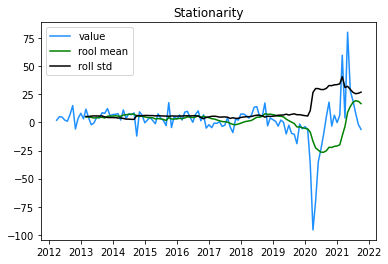

<Figure size 1600x1000 with 0 Axes>



test results:
Test statistic                                              -3.91898
p-value                                                   0.00189949
#Lags Used                                                         2
Number of obs                                                    112
Critical values    {'1%': -3.4901313156261384, '5%': -2.887712281...
#                                                             827.32
dtype: object


In [ ]:
test_sts = nm_gubc['Consumer_durables']
test_stationarity(test_sts)

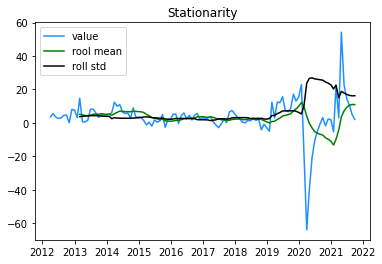

<Figure size 1600x1000 with 0 Axes>



test results:
Test statistic                                              -4.07673
p-value                                                   0.00105795
#Lags Used                                                        13
Number of obs                                                    101
Critical values    {'1%': -3.4968181663902103, '5%': -2.890610751...
#                                                            741.053
dtype: object


In [ ]:
test_sts = nm_gubc['Intermediate_goods']
test_stationarity(test_sts)

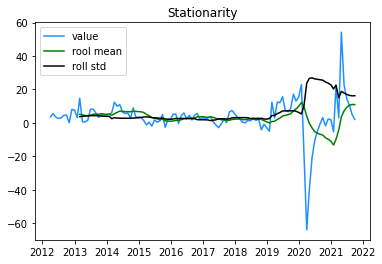

<Figure size 1600x1000 with 0 Axes>



test results:
Test statistic                                              -4.07673
p-value                                                   0.00105795
#Lags Used                                                        13
Number of obs                                                    101
Critical values    {'1%': -3.4968181663902103, '5%': -2.890610751...
#                                                            741.053
dtype: object


In [ ]:
test_sts = nm_gubc['Intermediate_goods']
test_stationarity(test_sts)

all columns are stationary since they met the condition.

Analysing the primary goods columns auto correlation

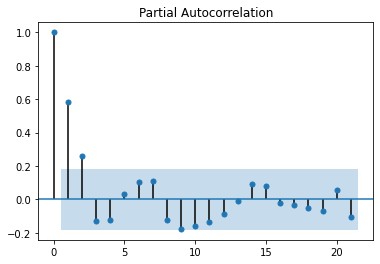

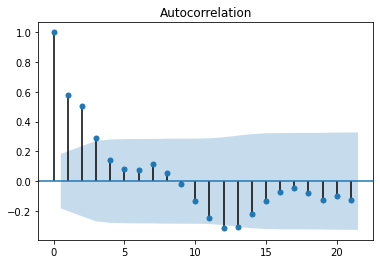

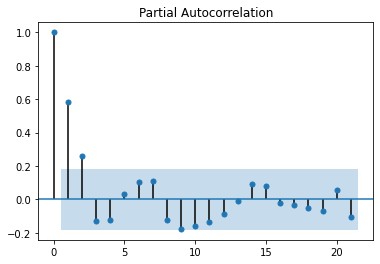

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(m_gubc['Consumer_durables'])
plot_pacf(m_gubc['Consumer_durables'])

We can infer from the autocorrelation scores we infer that the values or not stationary.We expect that the graphs autocorrelation would change drastically for consecutive period differences.

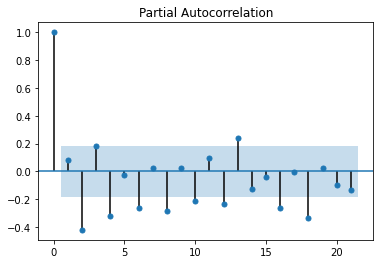

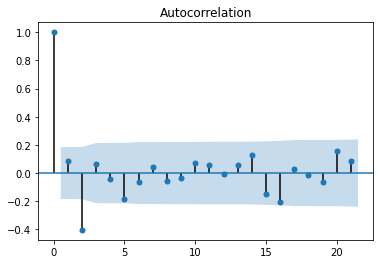

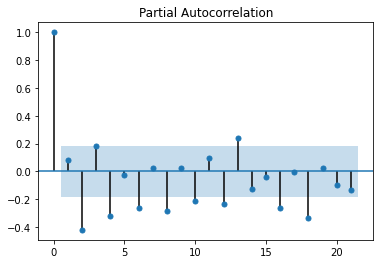

In [ ]:
Capital = nm_gubc['Consumer_durables']
Capital = np.log(abs(Capital))
Capital = Capital.diff(periods=2)
Capital = Capital.dropna()
plot_acf(Capital)
plot_pacf(Capital)


Differencing made the auto correlation as we expected with this we can train our ARIMA models.

No we need to plot the acf and pacf graphs to find the p and q values for ARIMA parameters

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


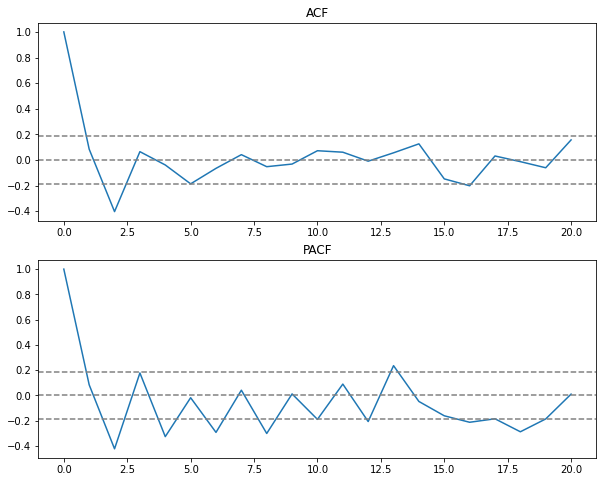

In [ ]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(Capital,nlags=20)
lag_pacf = pacf(Capital,nlags=20,method='ols')

fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,8))
ax[0].plot(lag_acf)
ax[0].axhline(y=0,linestyle='--',color='gray')
ax[0].axhline(y=-1.96/np.sqrt(len(Capital)),linestyle='--',color='gray')
ax[0].axhline(y=1.96/np.sqrt(len(Capital)),linestyle='--',color='gray')
ax[0].set_title("ACF")



ax[1].plot(lag_pacf)
ax[1].axhline(y=0,linestyle='--',color='gray')
ax[1].axhline(y=-1.96/np.sqrt(len(Capital)),linestyle='--',color='gray')
ax[1].axhline(y=1.96/np.sqrt(len(Capital)),linestyle='--',color='gray')
ax[1].set_title("PACF")
plt.show()


we can infer the values of p and q are 2,2 respectively




Model Splitiing:

Using first 50 values for training and next 20 for testing the model predicted values.

In [ ]:

train = Capital[:50]
test = Capital[50:70]

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
arima_mod = ARIMA(train,order=(2,1,2))
arima_fit =  arima_mod.fit()
prediction = arima_fit.forecast(steps=20)[0]
prediction

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


array([-0.91208224,  2.0977724 ,  0.01446409, -1.5111998 , -0.14340324,
        0.57738418, -0.30871771, -0.63974012, -0.10025222,  0.0198074 ,
       -0.31845127, -0.36207408, -0.17264435, -0.18025148, -0.30108761,
       -0.29491976, -0.23723461, -0.25901318, -0.30180833, -0.29613832])

In [ ]:
test

Date
2016-08-01    0.483797
2016-09-01    3.941582
2016-10-01   -1.582409
2016-11-01   -0.415221
2016-12-01    1.203973
2017-01-01   -1.223775
2017-02-01   -0.083382
2017-03-01   -1.203973
2017-04-01   -1.882731
2017-05-01    0.000000
2017-06-01    1.609438
2017-07-01    1.386294
2017-08-01    0.205852
2017-09-01    0.535518
2017-10-01    0.738610
2017-11-01   -0.279585
2017-12-01   -1.455287
2018-01-01    0.896746
2018-02-01    1.272966
2018-03-01   -0.203599
Name: Consumer_durables, dtype: float64

Plotting the predicted values versus the original values

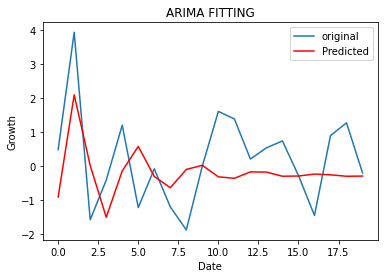

In [ ]:
plt.plot(test.values,label='original')
plt.plot(prediction,color='red',label='Predicted')
plt.legend(loc='best')
plt.title("ARIMA FITTING")
plt.xlabel("Date")
plt.ylabel("Growth")
plt.show()

In [ ]:
print(arima_fit.summary())

                              ARIMA Model Results                              
Dep. Variable:     D.Consumer_durables   No. Observations:                   49
Model:                  ARIMA(2, 1, 2)   Log Likelihood                 -70.634
Method:                        css-mle   S.D. of innovations              0.966
Date:                 Fri, 28 Jan 2022   AIC                            153.269
Time:                         04:29:04   BIC                            164.620
Sample:                     07-01-2012   HQIC                           157.575
                          - 07-01-2016                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0069      0.009     -0.732      0.468      -0.026       0.012
ar.L1.D.Consumer_durables    -0.1118      0.154     -0.726      0.471      -0.

Accuracy of the model could be visualized through the above graph

# **INDICES**

## PREPROCESSING:

In [ ]:
import numpy as np
import pandas as pd
import scipy as stat
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
m_iubc = pd.read_csv('https://raw.githubusercontent.com/sairam2661/datasets/main/Monthly_IUBC.csv?token=GHSAT0AAAAAABQAUXHSBHHIIGZD7YYL2E4WYPTOF4Q')
m_iubc.head()

Date  Primary goods  ...  Consumer durables  Consumer non-durables
0  Apr-12           98.2  ...              102.0                   97.0
1  May-12          104.0  ...              105.1                   99.8
2  Jun-12           99.7  ...              104.9                  104.9
3  Jul-12           98.9  ...              102.2                  103.7
4  Aug-12           96.5  ...              101.1                  103.8

[5 rows x 7 columns]

In [ ]:
m_iubc.tail()

Date  Primary goods  ...  Consumer durables  Consumer non-durables
110  Jun-21          122.4  ...              100.1                  141.8
111  Jul-21          128.5  ...              118.7                  145.9
112  Aug-21          127.3  ...              118.5                  147.9
113  Sep-21          117.3  ...              126.5                  147.7
114  Oct-21          128.5  ...              125.6                  149.5

[5 rows x 7 columns]

In [ ]:
m_iubc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                115 non-null    object 
 1   Primary goods                       115 non-null    float64
 2   Capital goods                       115 non-null    float64
 3   Intermediate goods                  115 non-null    float64
 4   Infrastructure/ construction goods  115 non-null    float64
 5   Consumer durables                   115 non-null    float64
 6   Consumer non-durables               115 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.4+ KB


There is no null values in any of the columns.
All columns are of object datatype

changing date from object to date.

In [ ]:
from datetime import datetime, date
# %b - Month in words
# %m - Month in number
# %Y - YYYY
# %y - YY

m_iubc['Date'] = pd.to_datetime(m_iubc['Date'],format = '%b-%y')
m_iubc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                115 non-null    datetime64[ns]
 1   Primary goods                       115 non-null    float64       
 2   Capital goods                       115 non-null    float64       
 3   Intermediate goods                  115 non-null    float64       
 4   Infrastructure/ construction goods  115 non-null    float64       
 5   Consumer durables                   115 non-null    float64       
 6   Consumer non-durables               115 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 6.4 KB


 replacing columns with " " to "_" for easy reading.

In [ ]:
m_iubc.columns =m_iubc.columns.str.replace(" ","_")
m_iubc.head() 

Date  Primary_goods  ...  Consumer_durables  Consumer_non-durables
0 2012-04-01           98.2  ...              102.0                   97.0
1 2012-05-01          104.0  ...              105.1                   99.8
2 2012-06-01           99.7  ...              104.9                  104.9
3 2012-07-01           98.9  ...              102.2                  103.7
4 2012-08-01           96.5  ...              101.1                  103.8

[5 rows x 7 columns]

Replacing unwanted symbols with respective most freqeunt values from respective columns

In [ ]:
'''m_gubc.loc[m_gubc['Primary_goods']=='#','Primary_goods'] = 4
m_gubc.loc[m_gubc['Capital_goods']=='#','Capital_goods'] = 3
m_gubc.loc[m_gubc['Intermediate_goods']=='#','Intermediate_goods'] = 3
m_gubc.loc[m_gubc['Infrastructure/_construction_goods']=='#','Infrastructure/_construction_goods'] = 3
m_gubc.loc[m_gubc['Consumer_durables']=='#','Consumer_durables'] = 4
m_gubc.loc[m_gubc['Consumer_non-durables']=='#','Consumer_non-durables'] = 4'''


"m_gubc.loc[m_gubc['Primary_goods']=='#','Primary_goods'] = 4\nm_gubc.loc[m_gubc['Capital_goods']=='#','Capital_goods'] = 3\nm_gubc.loc[m_gubc['Intermediate_goods']=='#','Intermediate_goods'] = 3\nm_gubc.loc[m_gubc['Infrastructure/_construction_goods']=='#','Infrastructure/_construction_goods'] = 3\nm_gubc.loc[m_gubc['Consumer_durables']=='#','Consumer_durables'] = 4\nm_gubc.loc[m_gubc['Consumer_non-durables']=='#','Consumer_non-durables'] = 4"

converting object datatype to numeric

In [ ]:
date =  m_iubc['Date']
m_iubc = m_gubc.drop(columns=['Date']).apply(pd.to_numeric)
m_iubc['Date'] = date
m_iubc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Primary_goods                       115 non-null    float64       
 1   Capital_goods                       115 non-null    float64       
 2   Intermediate_goods                  115 non-null    float64       
 3   Infrastructure/_construction_goods  115 non-null    float64       
 4   Consumer_durables                   115 non-null    float64       
 5   Consumer_non-durables               115 non-null    float64       
 6   Date                                115 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 6.4 KB


##DATA VIZUALIZATION:

1.for every feature plot a line plot having time as x axis and a particular feature as y axis.

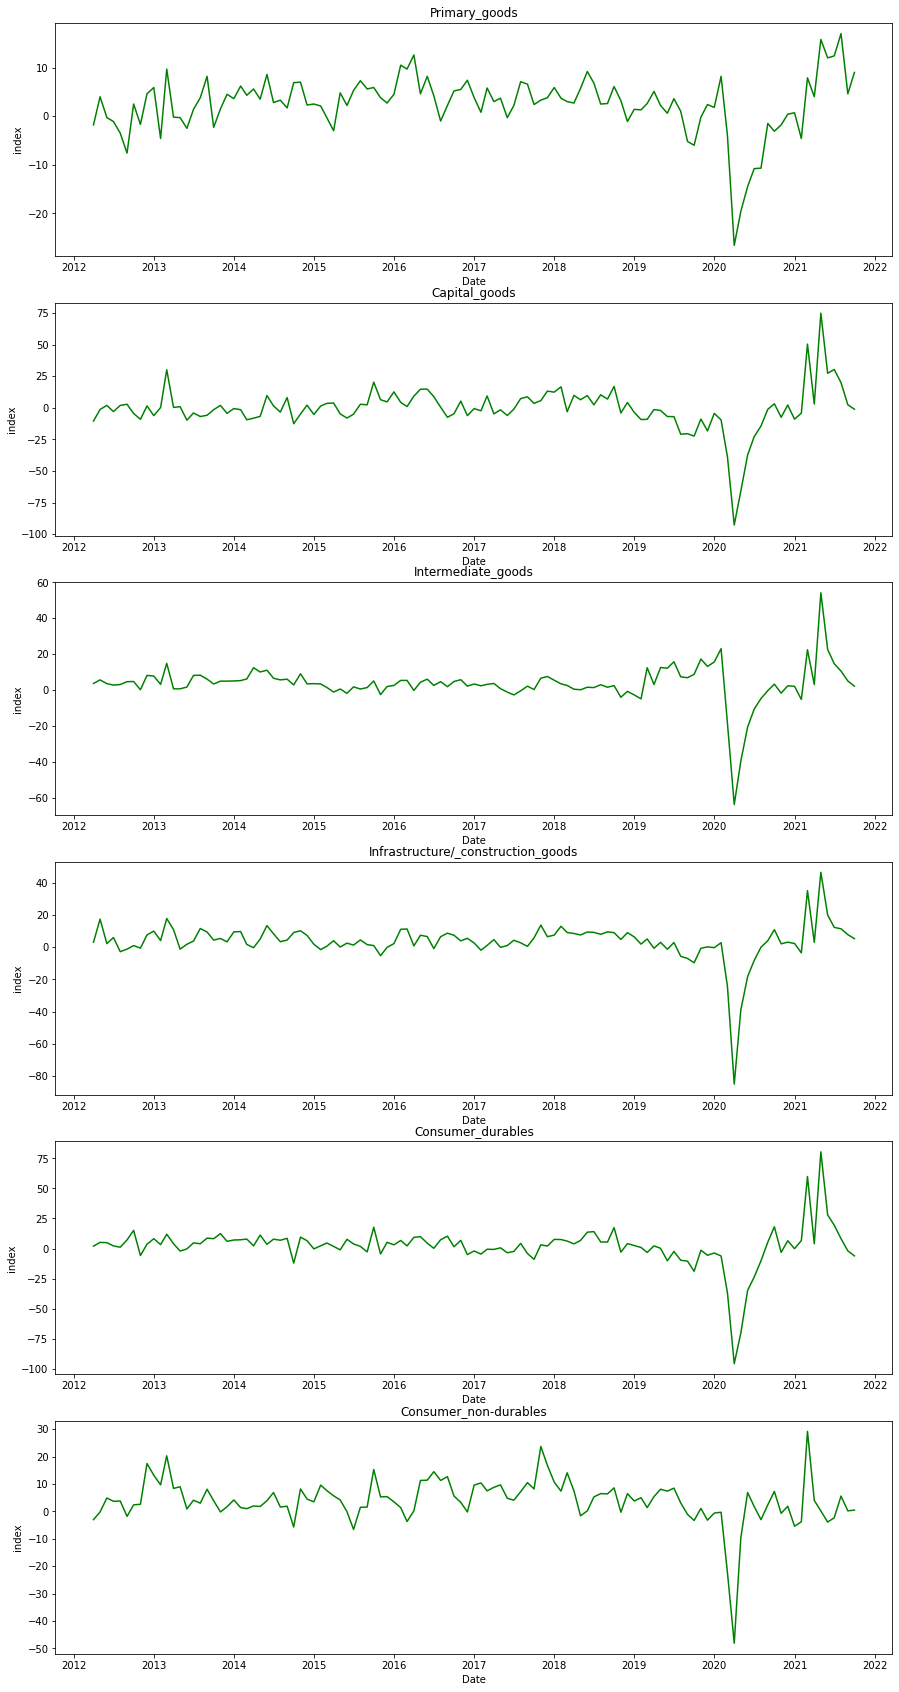

In [ ]:
figure,axes = plt.subplots(nrows=6,ncols=1,figsize=(15,30))

for index,col in enumerate(m_iubc.drop('Date',axis=1).columns):
  sns.lineplot(ax=axes[index],x='Date',y=col,data=m_iubc,color='green')
  axes[index].set_title("{}".format(col))
  axes[index].set_ylabel("index")
 # axes[index].set_xlim([date(2012, 4, 1), date(2021, 10, 1)]) 

Stationarity check:
checking for constant mean and variance.



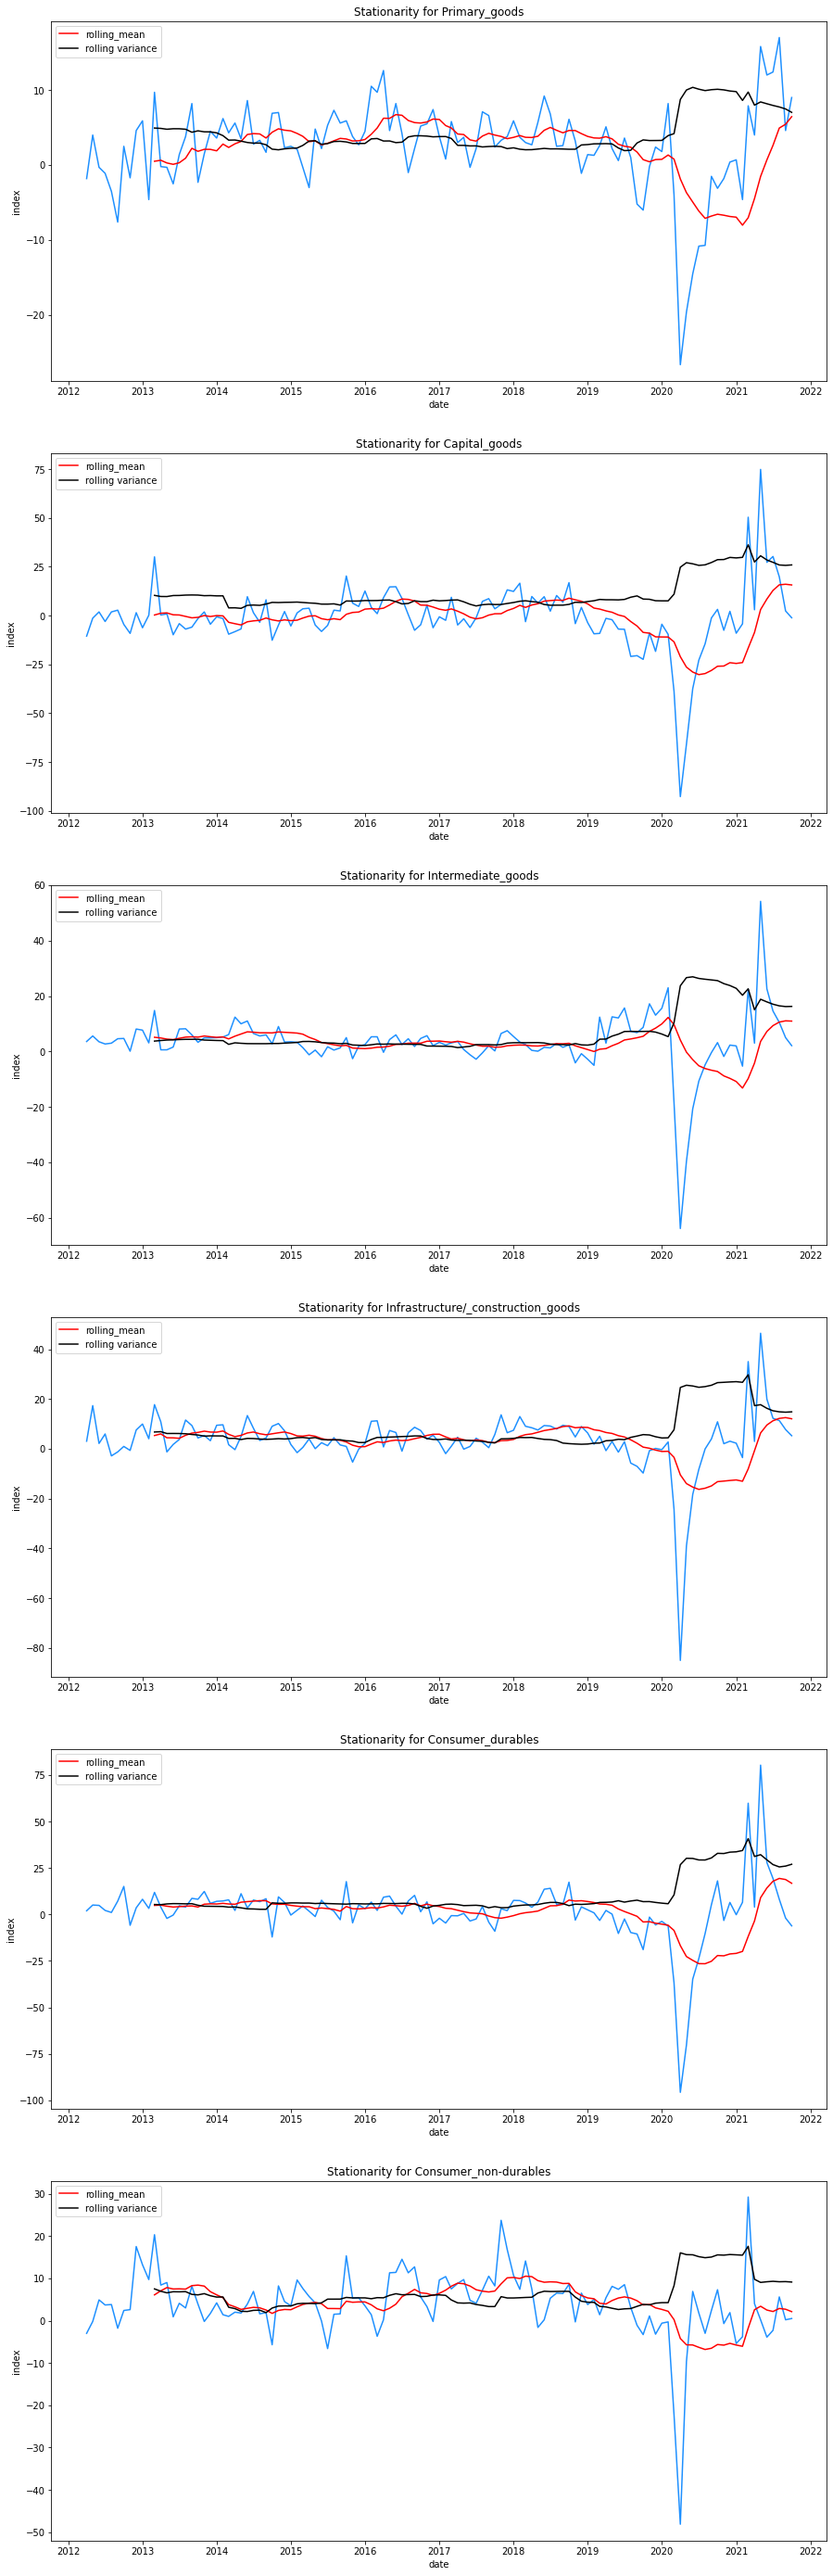

In [ ]:
figure,axes = plt.subplots(nrows=6,ncols=1,figsize=(15,50))
months=12

for index,column in enumerate(m_iubc.drop('Date',axis=1).columns):
  sns.lineplot(ax=axes[index],x=m_iubc['Date'],y=m_iubc[column],color='dodgerblue')
  sns.lineplot(ax=axes[index],x=m_iubc['Date'],y=m_iubc[column].rolling(months).mean(),color='red',label='rolling_mean')
  sns.lineplot(ax=axes[index],x=m_iubc['Date'],y=m_iubc[column].rolling(months).std(),color='black',label='rolling variance')
  axes[index].set_title("Stationarity for {}".format(column))
  axes[index].set_ylabel("index")
  axes[index].set_xlabel("date")
  #axes[index].set_xlim([date(2012, 4, 1), date(2021, 10, 1)])
  #axes[index].set_ylim(m_gubc[column].min,m_gubc.[column].max)

DECOMPOSITION:

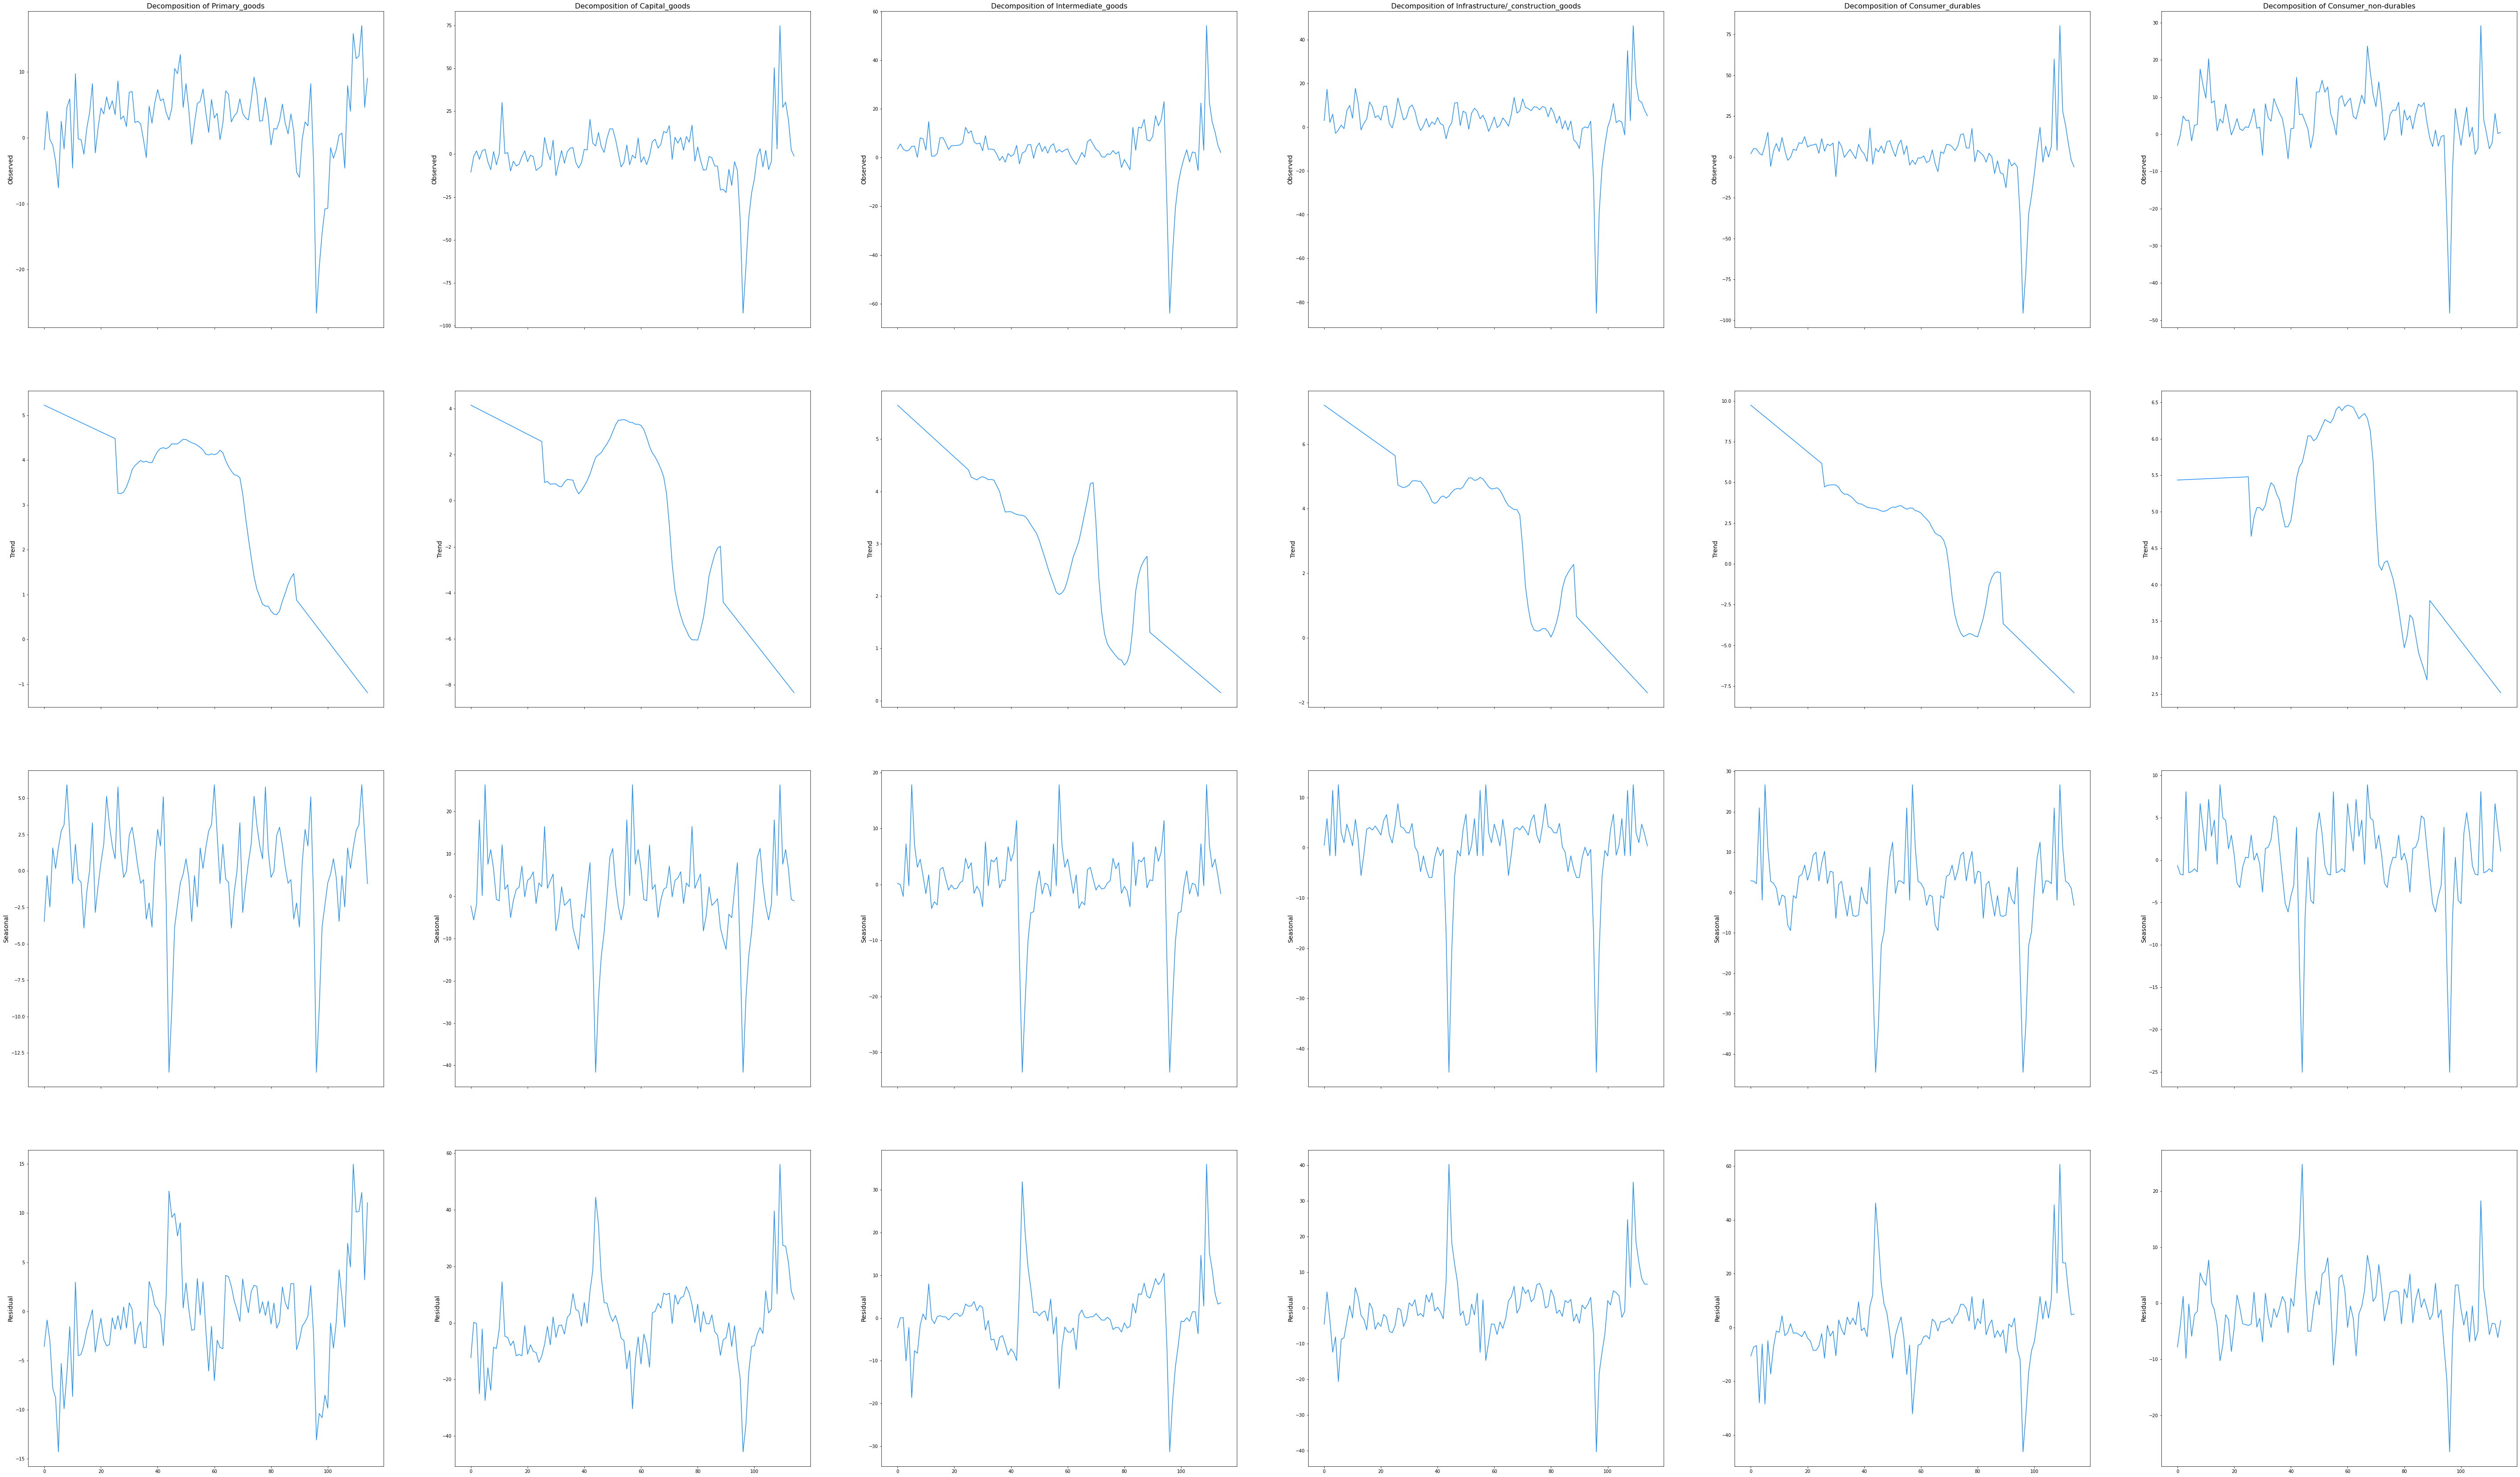

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
figure, axes = plt.subplots(nrows=4,ncols=6,sharex=True, figsize=(100,60))
for i,column in enumerate(m_iubc.drop('Date',axis=1).columns):
    res = seasonal_decompose(m_iubc[column], freq=52, model='additive', extrapolate_trend='freq')

    axes[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=axes[0,i], legend=False, color='dodgerblue')
    axes[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=axes[1,i], legend=False, color='dodgerblue')
    axes[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=axes[2,i], legend=False, color='dodgerblue')
    axes[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=axes[3,i], legend=False, color='dodgerblue')
    axes[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

CHECKING CORRELATION:

In [ ]:
corr_table_i = m_iubc.corr()
corr_table_i.style.background_gradient()

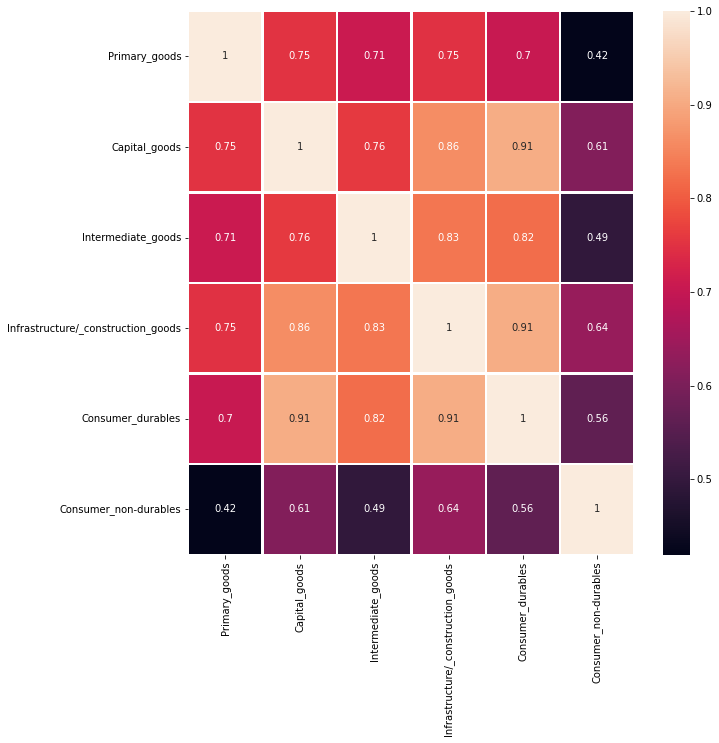

In [ ]:
 figure,axes=plt.subplots(figsize=(10,10))
 sns.heatmap(corr_table_i,ax=axes,linewidths=1.5,annot=True)


In [ ]:
corr_list = []
column= list(enumerate(m_iubc.drop('Date',axis=1).columns))
for i,col in enumerate(m_iubc.drop('Date',axis=1).columns):
    corr_table_i.sort_values(by=col,inplace=True)
    corr_list.append(corr_table_i[col])
i=0
for series in corr_list:
    print("{} and {} : {}".format(series.index[4],column[i][1],series.iloc[4]))
    i=i+1



Capital_goods and Primary_goods : 0.7505066723878792
Consumer_durables and Capital_goods : 0.9053834446836689
Infrastructure/_construction_goods and Intermediate_goods : 0.8335565702574032
Consumer_durables and Infrastructure/_construction_goods : 0.9053953221565173
Infrastructure/_construction_goods and Consumer_durables : 0.9053953221565173
Infrastructure/_construction_goods and Consumer_non-durables : 0.6387700727877045


##EXPLORATORY ANALYSIS

In [ ]:
dm_iubc = m_iubc.copy()

In [ ]:
dm_iubc['Year'] = pd.DatetimeIndex(m_iubc['Date']).year
dm_iubc['Month'] = pd.DatetimeIndex(m_iubc['Date']).month
dm_iubc['Week_of_year'] = pd.DatetimeIndex(m_iubc['Date']).weekofyear
dm_iubc['Quarter'] = pd.DatetimeIndex(m_iubc['Date']).quarter
dm_iubc.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


Primary_goods  Capital_goods  ...  Week_of_year  Quarter
0           -1.8          -10.5  ...            13        2
1            4.0           -1.3  ...            18        2
2           -0.3            1.9  ...            22        2
3           -1.1           -3.0  ...            26        3
4           -3.5            1.9  ...            31        3
5           -7.6            2.8  ...            35        3
6            2.5           -4.5  ...            40        4
7           -1.7           -9.1  ...            44        4
8            4.6            1.5  ...            48        4
9            5.9           -6.2  ...             1        1

[10 rows x 11 columns]

In [ ]:
dm_iubc.drop(columns=['Date'],inplace=True)
dm_iubc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Primary_goods                       115 non-null    float64
 1   Capital_goods                       115 non-null    float64
 2   Intermediate_goods                  115 non-null    float64
 3   Infrastructure/_construction_goods  115 non-null    float64
 4   Consumer_durables                   115 non-null    float64
 5   Consumer_non-durables               115 non-null    float64
 6   Year                                115 non-null    int64  
 7   Month                               115 non-null    int64  
 8   Week_of_year                        115 non-null    int64  
 9   Quarter                             115 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 9.1 KB


AGGREGATE SALES

In [ ]:
y_table_i=dm_iubc.pivot_table(index='Year',values=['Primary_goods','Capital_goods','Intermediate_goods','Infrastructure/_construction_goods','Consumer_durables','Consumer_non-durables'],aggfunc='mean')
y_table_i.style.background_gradient('Blues')

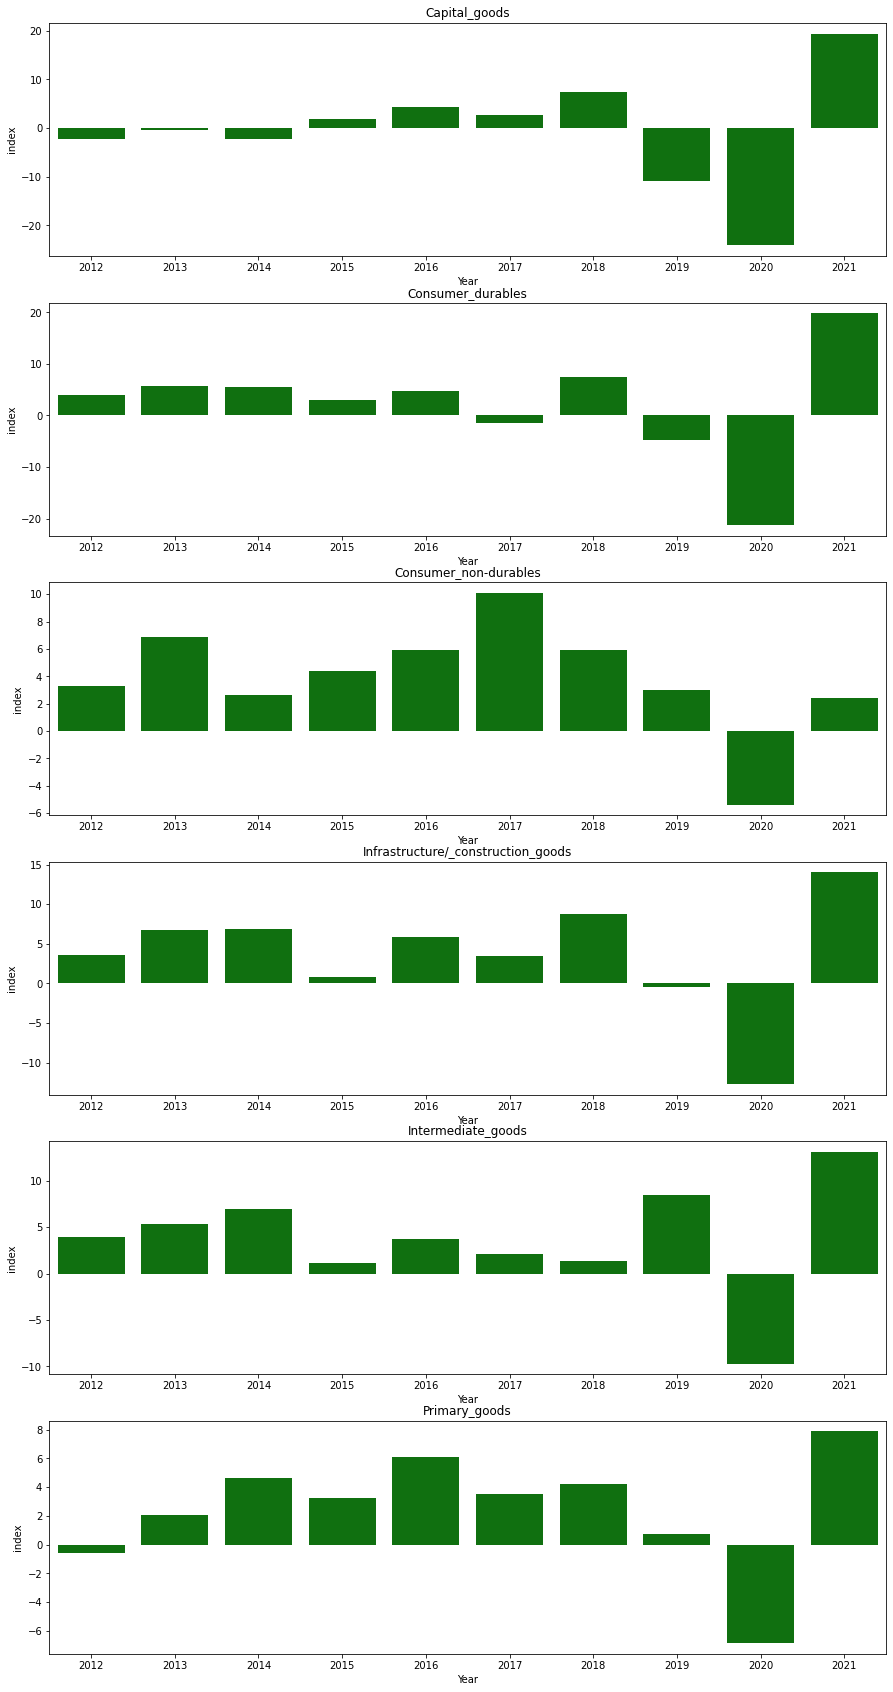

In [ ]:
fig,ax = plt.subplots(nrows=6,ncols=1,figsize=(15,30))

for i,col in enumerate(y_table_i.columns):
  sns.barplot(x=y_table_i.index,y=y_table_i[col],ax=ax[i],color='green')
  ax[i].set_title("{}".format(col))
  ax[i].set_ylabel("index")

INFERENCE:
1.

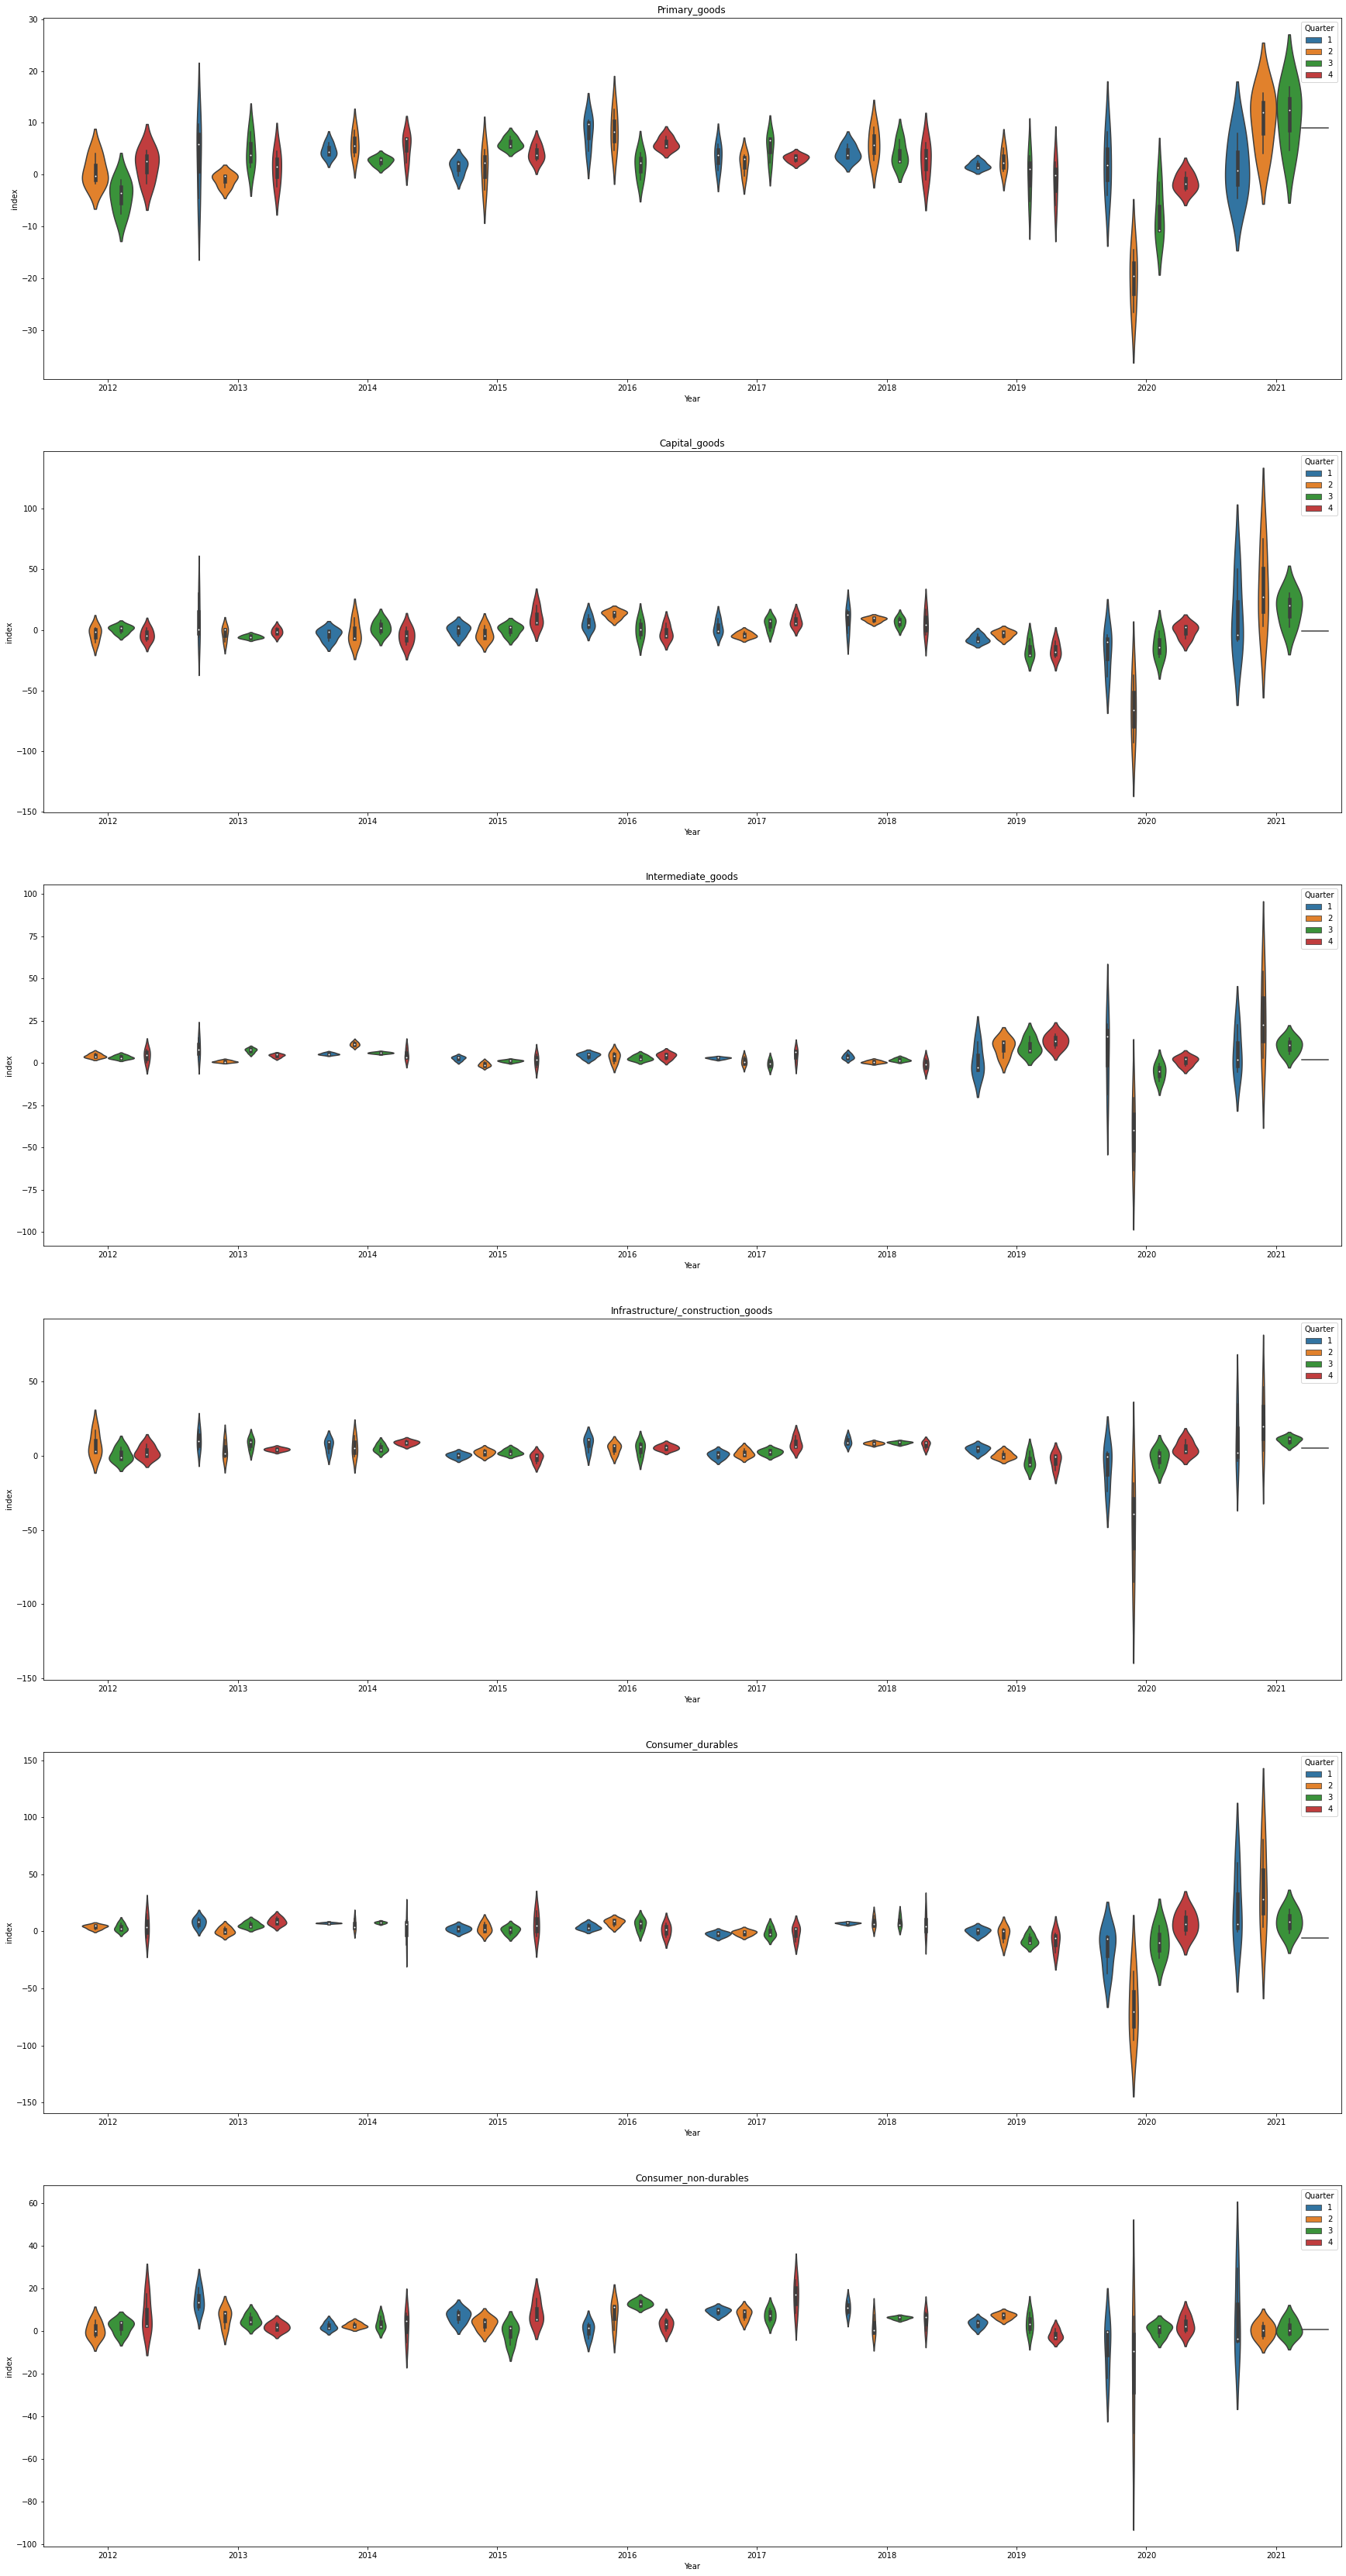

In [ ]:
fig,ax = plt.subplots(nrows=6,ncols=1,figsize=(30,60))
i=0
for col in list(dm_iubc.drop(columns=['Year','Month','Week_of_year','Quarter']).columns):
  sns.violinplot(x='Year',y=col,hue='Quarter',data=dm_iubc,ax=ax[i])
  ax[i].set_title("{}".format(col))
  ax[i].set_ylabel("index")
  i=i+1

Through the above plot we can infer the sales of each goods and their performance in each quarters.

Seasonal influences on every product could be studied in detail using the plot

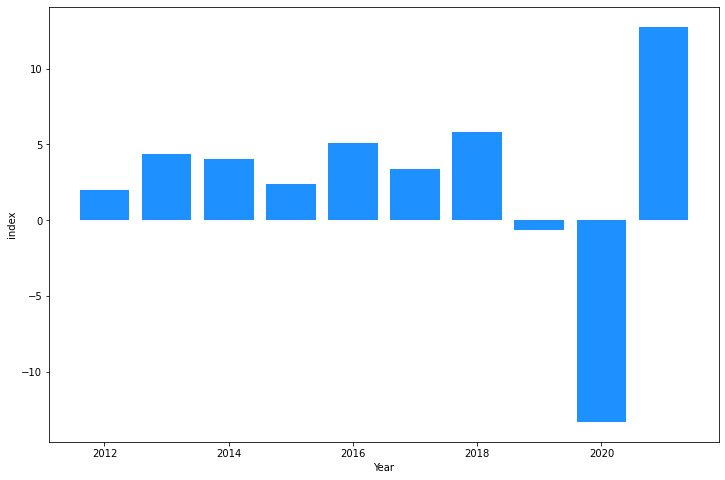

In [ ]:
plt.figure(figsize=(12,8))
bars=plt.bar(x=y_table_i.index,height=y_table_i.T.mean(),color='dodgerblue')
plt.xlabel('Year')
plt.ylabel('index')
plt.show()
#sns.(x=y_table.index,y=std_table.T.mean,color='black')
#plt.show()


In [ ]:
m_iubc.describe()

Primary_goods  Capital_goods  ...  Consumer_durables  Consumer_non-durables
count     115.000000     115.000000  ...         115.000000             115.000000
mean        2.490435      -0.723478  ...           1.943478               3.971304
std         5.996885      17.341611  ...          17.107176               8.161052
min       -26.600000     -92.700000  ...         -95.700000             -48.100000
25%         0.100000      -6.200000  ...          -2.050000               0.350000
50%         3.000000      -1.100000  ...           3.500000               3.900000
75%         5.650000       5.000000  ...           7.250000               7.850000
max        17.000000      74.900000  ...          80.400000              29.200000

[8 rows x 6 columns]

AUTO CORRELATION:

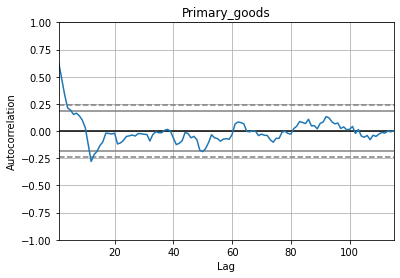

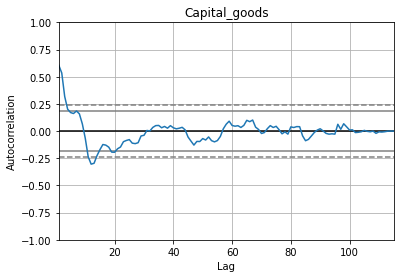

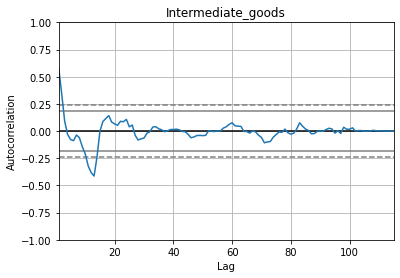

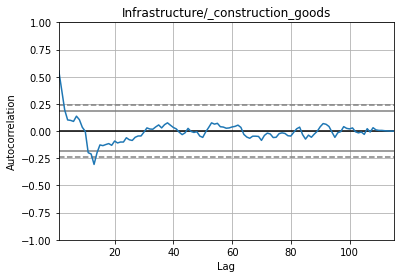

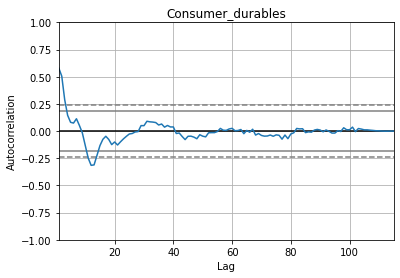

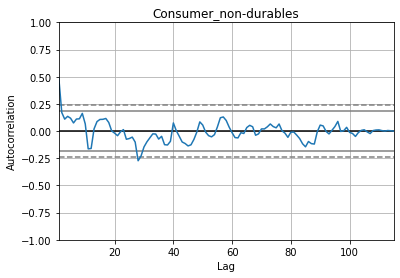

In [ ]:
from pandas.plotting import autocorrelation_plot
for column in m_iubc.drop('Date', axis=1):
    autocorrelation_plot(m_iubc[column])
    plt.title('{}'.format(column))
    plt.show()

##Modelling

### AUGMENTED DICKY FULLER TEST

to confirm the presence of stationarity of values we using a statistical method called unit root test.

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(series):

  roll_avg = series.rolling(12).mean()
  roll_std = series.rolling(12).std()

  plt.plot(series,color='dodgerblue',label='value')
  plt.plot(roll_avg,color='green',label='rool mean')
  plt.plot(roll_std,color='black',label='roll std')
  plt.legend(loc='best')
  plt.title('Stationarity')
  plt.figure(dpi=200,figsize=(8,5))
  plt.show()

  print("\n\ntest results:")
  result = adfuller(series,autolag='AIC')
  ouput = pd.Series(result,index=['Test statistic','p-value','#Lags Used','Number of obs','Critical values','#'])
  print(ouput)

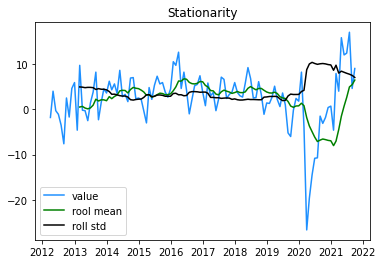

<Figure size 1600x1000 with 0 Axes>



test results:
Test statistic                                              -5.00742
p-value                                                  2.14547e-05
#Lags Used                                                         0
Number of obs                                                    114
Critical values    {'1%': -3.489057523907491, '5%': -2.8872463271...
#                                                            592.268
dtype: object


In [ ]:

nm_iubc = m_iubc.set_index('Date')
test_sts = nm_iubc['Primary_goods']
test_stationarity(test_sts)


Since Test statistic > critical value we cannot reject null hypothesis so we need to make it stationary

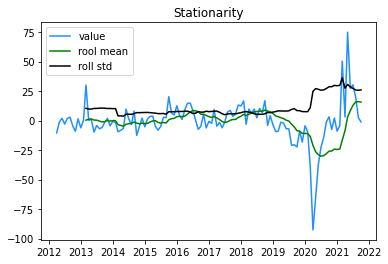

<Figure size 1600x1000 with 0 Axes>



test results:
Test statistic                                              -3.87741
p-value                                                   0.00220753
#Lags Used                                                        10
Number of obs                                                    104
Critical values    {'1%': -3.4948504603223145, '5%': -2.889758398...
#                                                            816.069
dtype: object


In [ ]:
test_sts = nm_iubc['Capital_goods']
test_stationarity(test_sts)



Since Test statistic > critical value we cannot reject null hypothesis so we need to make it stationary





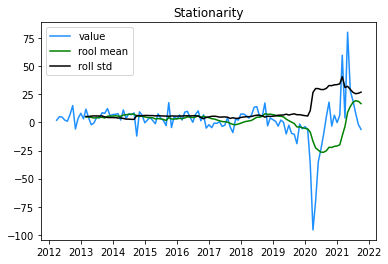

<Figure size 1600x1000 with 0 Axes>



test results:
Test statistic                                              -3.91898
p-value                                                   0.00189949
#Lags Used                                                         2
Number of obs                                                    112
Critical values    {'1%': -3.4901313156261384, '5%': -2.887712281...
#                                                             827.32
dtype: object


In [ ]:
test_sts = nm_iubc['Consumer_durables']
test_stationarity(test_sts)

Consumer_durables are stationary

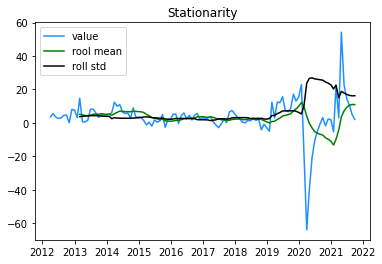

<Figure size 1600x1000 with 0 Axes>



test results:
Test statistic                                              -4.07673
p-value                                                   0.00105795
#Lags Used                                                        13
Number of obs                                                    101
Critical values    {'1%': -3.4968181663902103, '5%': -2.890610751...
#                                                            741.053
dtype: object


In [ ]:
test_sts = nm_iubc['Intermediate_goods']
test_stationarity(test_sts)


Since Test statistic > critical value we cannot reject null hypothesis so we need to make it stationary


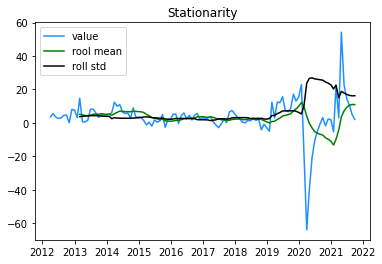

<Figure size 1600x1000 with 0 Axes>



test results:
Test statistic                                              -4.07673
p-value                                                   0.00105795
#Lags Used                                                        13
Number of obs                                                    101
Critical values    {'1%': -3.4968181663902103, '5%': -2.890610751...
#                                                            741.053
dtype: object


In [ ]:
test_sts = nm_iubc['Intermediate_goods']
test_stationarity(test_sts)


Since Test statistic > critical value we cannot reject null hypothesis so we need to make it stationary


Analysing the primary goods columns auto correlation

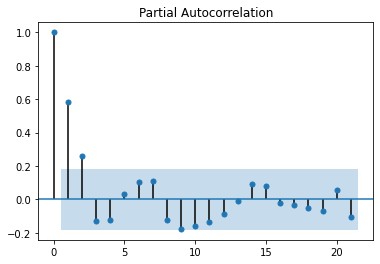

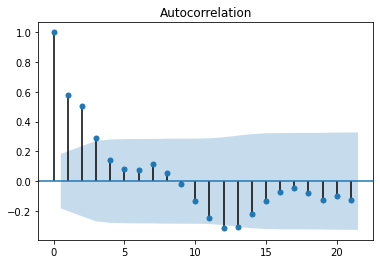

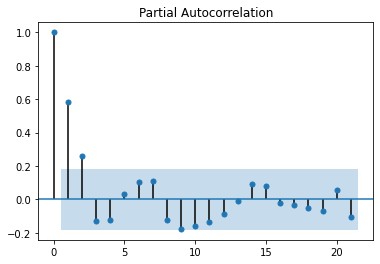

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(m_iubc['Consumer_durables'])
plot_pacf(m_iubc['Consumer_durables'])

We can infer from the autocorrelation scores we infer that the values or not stationary.We expect that the graphs autocorrelation would change drastically for consecutive period differences.

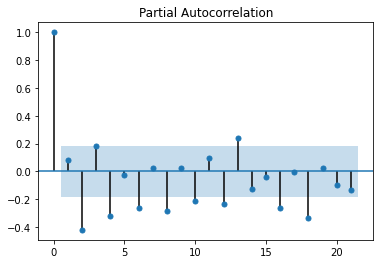

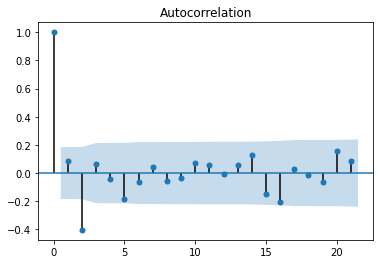

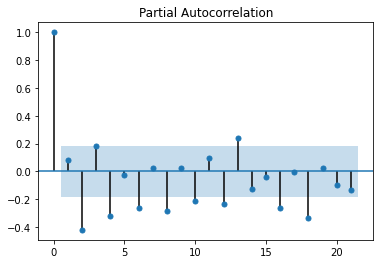

In [ ]:
Capital = nm_iubc['Consumer_durables']
Capital = np.log(abs(Capital))
Capital = Capital.diff(periods=2)
Capital = Capital.dropna()
plot_acf(Capital)
plot_pacf(Capital)


Differencing made the auto correlation as we expected with this we can train our ARIMA models.

No we need to plot the acf and pacf graphs to find the p and q values for ARIMA parameters

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


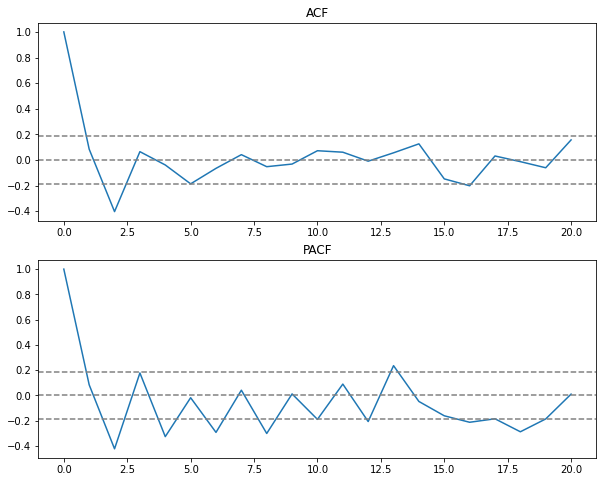

In [ ]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(Capital,nlags=20)
lag_pacf = pacf(Capital,nlags=20,method='ols')

fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,8))
ax[0].plot(lag_acf)
ax[0].axhline(y=0,linestyle='--',color='gray')
ax[0].axhline(y=-1.96/np.sqrt(len(Capital)),linestyle='--',color='gray')
ax[0].axhline(y=1.96/np.sqrt(len(Capital)),linestyle='--',color='gray')
ax[0].set_title("ACF")



ax[1].plot(lag_pacf)
ax[1].axhline(y=0,linestyle='--',color='gray')
ax[1].axhline(y=-1.96/np.sqrt(len(Capital)),linestyle='--',color='gray')
ax[1].axhline(y=1.96/np.sqrt(len(Capital)),linestyle='--',color='gray')
ax[1].set_title("PACF")
plt.show()


we can infer the values of p and q are 2,2 respectively




Model Splitiing:

Using first 50 values for training and next 20 for testing the model predicted values.

In [ ]:

train = Capital[:50]
test = Capital[50:70]

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
arima_mod = ARIMA(train,order=(3,1,1))
arima_fit =  arima_mod.fit()
prediction = arima_fit.forecast(steps=20)[0]
prediction

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


array([-0.77500448,  2.00979038, -0.00415272, -1.81584496, -0.3159562 ,
        0.9332562 , -0.15756389, -1.02018076, -0.24110193,  0.33651035,
       -0.23854512, -0.64388903, -0.24094965,  0.02279248, -0.27983058,
       -0.47064998, -0.26497283, -0.14768959, -0.30773983, -0.39877928])

In [ ]:
test

Date
2016-08-01    0.483797
2016-09-01    3.941582
2016-10-01   -1.582409
2016-11-01   -0.415221
2016-12-01    1.203973
2017-01-01   -1.223775
2017-02-01   -0.083382
2017-03-01   -1.203973
2017-04-01   -1.882731
2017-05-01    0.000000
2017-06-01    1.609438
2017-07-01    1.386294
2017-08-01    0.205852
2017-09-01    0.535518
2017-10-01    0.738610
2017-11-01   -0.279585
2017-12-01   -1.455287
2018-01-01    0.896746
2018-02-01    1.272966
2018-03-01   -0.203599
Name: Consumer_durables, dtype: float64

Plotting the predicted values versus the original values

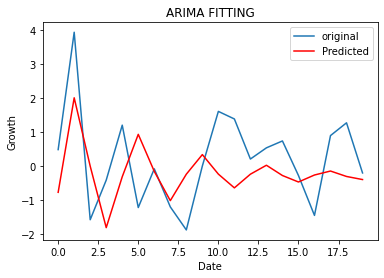

In [ ]:
plt.plot(test.values,label='original')
plt.plot(prediction,color='red',label='Predicted')
plt.legend(loc='best')
plt.title("ARIMA FITTING")
plt.xlabel("Date")
plt.ylabel("Growth")
plt.show()

Accuracy of the model could be visualized through the above graph

In [ ]:
print(arima_fit.summary())

                              ARIMA Model Results                              
Dep. Variable:     D.Consumer_durables   No. Observations:                   49
Model:                  ARIMA(3, 1, 1)   Log Likelihood                 -72.726
Method:                        css-mle   S.D. of innovations              1.012
Date:                 Fri, 28 Jan 2022   AIC                            157.453
Time:                         04:31:31   BIC                            168.804
Sample:                     07-01-2012   HQIC                           161.760
                          - 07-01-2016                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0071      0.010     -0.698      0.489      -0.027       0.013
ar.L1.D.Consumer_durables     0.4012      0.152      2.644      0.011       0.